<span  style="color:green">
    
# All the Lifecycle In A Data Science Project
      
</span>

  1. *Data Collection* and Business Understanding
  2. Exploratory Data Analysis (EDA)
  3. Feature Engineering
  4. Model Building
  5. Model Deployment

# Section 1: Data Collection and Business Understanding

Loan Default Prediction
Business Understanding:
Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. It was
the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange
Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online
lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by
payments made on loans. Lending Club is the world's largest peer-to-peer lending platform.
Lending Club enables borrowers to create unsecured personal loans between $1,000 and $40,000. The
standard loan period is three years. Investors can search and browse the loan listings on Lending Club
website and select loans that they want to invest in based on the information supplied about the borrower,
amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes
money by charging borrowers an origination fee and investors a service fee.

In [4]:
from IPython.core.display import HTML

In [5]:
%%HTML
<iframe width='650' height='315' src='https://www.youtube.com/watch?v=HW29067qVWk' frameborder ='0' allowfullscreen></iframe>

In [6]:
# For Data preparation and manipulation
import numpy as np
import pandas as pd
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,r2_score, confusion_matrix

# For Scaling the data
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# For Splitting the data for training and Validation
from sklearn.model_selection import train_test_split, cross_val_score

# For Creating model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [7]:
loan_train = pd.read_csv('E:/Data_Science/Projects/3-Bank_Load_Project/Dataset/credit_train.csv')

## **Study of data**
* ID: This is customer ID with the bank starting from 1 to 5000 and will not contribute in any way to predict the likelihood of a customer buying personal loans. Hence this ID column can be dropped.

- Age: Customer's age, a discrete variable from 23 to 67 years, has a very high Pearson correlation (ρ = 0.99) with the 'Experience' of customer. Hence one of it can be considered as a redundant variable.

* Experience: Customers' years of professional experience, also a discrete variable from -3 to 43, has some negative values in data that is logically impossible and in relation to age collecting values for experience from customer can be challenging. Hence Experience can also be dropped.

- Income: Annual income of the customer is right skewed with a range of 8,000 to 2,24,000 dollars. It has relatively better Pearson correlation (ρ = 0.50) with Personal Loan, which states if the customer accepted personal loans in the last campaign.

* This can be a good predictor of the likelihood of a customer buying personal loans. It indicates majority of the customers earn between 28,000 to 120,000 dollars.

- ZIP_Code: Home Address ZIP code may contribute to this model in cases where data is observed to be concentrated in a locality. Further study is required to understand its importance.

* Family: Family size of the customer, also a discrete variable from 1 to 4, can also be a good indicator of liability along with other parameters.

- CC_Avg: Average spending on credit cards per month, is highly right skewed with a range of 0 to 10,000 dollars and mean of 1,937. It has relatively good Pearson correlation (ρ = 0.37) with Personal Loan as well. This can also be a good indicator of liability to the customer and a good predictor of the likelihood of a customer buying personal loans.

* Education: Education Level. 1: Undergrad, 2: Graduate and 3: Advanced/Professional is an ordinal value. Data appears to be indicating that majority of the customers are Undergrads.
- Mortgage: Value of house mortgage if availed by the customer, is highly right skewed with a range of 0 to 6,35,000 dollars. A median of 0 and mean of 56,498 indicates majority of the customers have not availed a house mortgage.
 
* Personal_Loan: Acceptance of the personal loan offered in the last campaign is a binary categorical variable indicating the customer accepted the personal loan or not. Mean indicating only 9.6% accepted the offer. This can be the target variable. There seems to be a heavy class imbalance in here that might create a biased model.
 
- Securities_Account: Customer has a securities account with the bank or not is a binary categorical variable. Mean indicating 10.44% has a securities account.
 
 * CD_Account: Customer has a certificate of deposit (CD) account with the bank or not is also a binary categorical variable. Mean indicating 6.04% has a CD account. It has relatively good Pearson correlation (ρ = 0.32) with Personal Loan as well.
 
- Online: Customer uses internet banking facilities or not is also a binary categorical variable. Mean indicating 59.68% uses internet banking facilities.
 
* Credit_Card: Customer uses a credit card issued by Universal Bank or not is also a binary categorical variable. Mean indicating 29.4% uses credit card.
- The dataset is collected from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

In [8]:
loan_train.shape

(100514, 19)

In [9]:
loan_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [10]:
loan_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [11]:
loan_train.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [12]:
loan_train['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [13]:
loan_train.shape

(100514, 19)

In [14]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [15]:
loan_train.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [16]:
loan_train.isnull().sum()/len(loan_train)*100

Loan ID                          0.511372
Customer ID                      0.511372
Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

# Section 2: Exploratory Data Analysis(EDA)

*In Data Analysis We will Analyze To Find out the below stuff:* We will not delete or modify any feature. We just investigate our data to understand below topics.
1. Missing Values
2. **All The Numerical Variables**
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(Target).

#### Section 2-1: Missing Values

* Here we will check the percentage of nan values presented in each feature, we will handling Missing values in Feature Engineering.Now the avarage or the mean score look intutive, so we will move forward by dropping some unwanted columns.
-  we are dropping Loan ID, Customer ID, these are categorical data and they actually have no effect on the Loaun Status, and we are droping the columns with 50% or more null values.

In [17]:
loan = loan_train.drop(['Loan ID', 'Customer ID','Months since last delinquent'],axis=1)

In [18]:
features_with_nan = [features for features in loan.columns if loan[features].isnull().sum()>1]
features_with_nan

['Loan Status',
 'Current Loan Amount',
 'Term',
 'Credit Score',
 'Annual Income',
 'Years in current job',
 'Home Ownership',
 'Purpose',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [19]:
loan.shape

(100514, 16)

In [20]:
for feature in loan.columns:
    print(loan[feature].isnull().sum(), feature)

514 Loan Status
514 Current Loan Amount
514 Term
19668 Credit Score
19668 Annual Income
4736 Years in current job
514 Home Ownership
514 Purpose
514 Monthly Debt
514 Years of Credit History
514 Number of Open Accounts
514 Number of Credit Problems
514 Current Credit Balance
516 Maximum Open Credit
718 Bankruptcies
524 Tax Liens


In [21]:
loan.isnull().sum()/len(loan)*100

Loan Status                   0.511372
Current Loan Amount           0.511372
Term                          0.511372
Credit Score                 19.567423
Annual Income                19.567423
Years in current job          4.711781
Home Ownership                0.511372
Purpose                       0.511372
Monthly Debt                  0.511372
Years of Credit History       0.511372
Number of Open Accounts       0.511372
Number of Credit Problems     0.511372
Current Credit Balance        0.511372
Maximum Open Credit           0.513361
Bankruptcies                  0.714328
Tax Liens                     0.521320
dtype: float64

In [22]:
# We will find percentage of missing value in every feature
for feature in features_with_nan:
    print(feature, '     ', np.round(loan[feature].isnull().mean()*100, 4), '% missing values') 

Loan Status       0.5114 % missing values
Current Loan Amount       0.5114 % missing values
Term       0.5114 % missing values
Credit Score       19.5674 % missing values
Annual Income       19.5674 % missing values
Years in current job       4.7118 % missing values
Home Ownership       0.5114 % missing values
Purpose       0.5114 % missing values
Monthly Debt       0.5114 % missing values
Years of Credit History       0.5114 % missing values
Number of Open Accounts       0.5114 % missing values
Number of Credit Problems       0.5114 % missing values
Current Credit Balance       0.5114 % missing values
Maximum Open Credit       0.5134 % missing values
Bankruptcies       0.7143 % missing values
Tax Liens       0.5213 % missing values


In [23]:
loan[loan['Current Loan Amount'].isnull()]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
for feature in loan.columns:
          data = loan.copy()

In [25]:
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data['feature'] = np.where(data['Loan Status'].isnull(), 1, 0)

In [27]:
data.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,feature
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0,0
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0,0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0,0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0,0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0,0


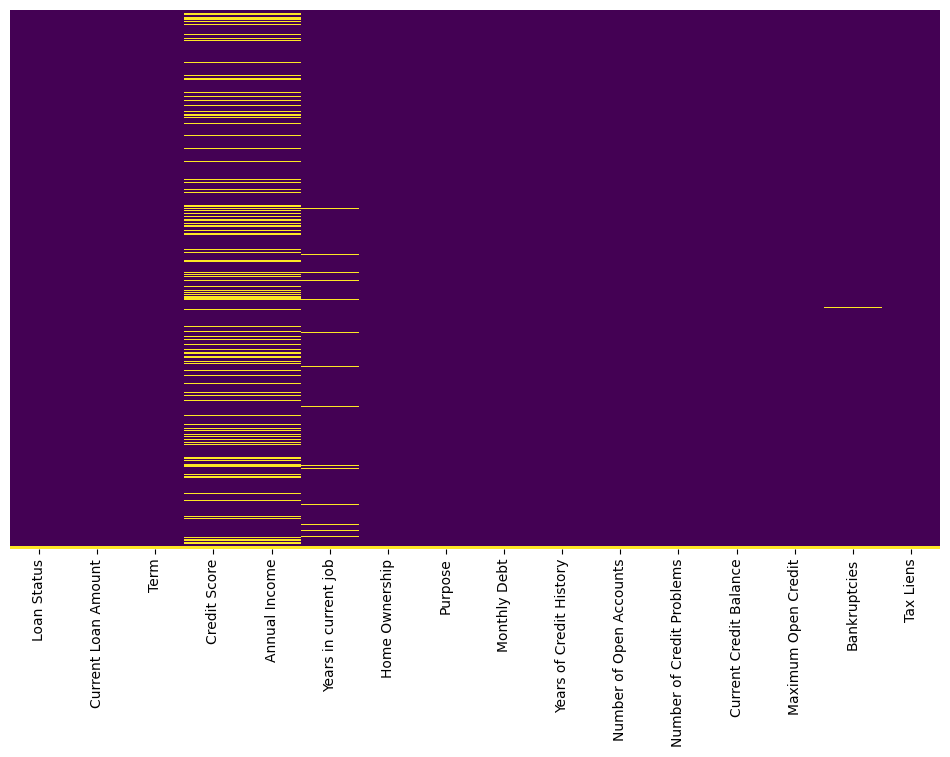

In [28]:
# Heat Map
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(loan.isnull(), yticklabels=False, cmap="viridis", cbar=False, ax=ax)
plt.show()

#### Section 2-2: Numerical and Categorical Variables

In this section we will indentify Numerical Variable.

In [29]:
numerical_features = [feature for feature in loan.columns if loan[feature].dtypes !='O']
numerical_features

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

In [30]:
# Identify numerical columns
numerical_cols = loan.select_dtypes(include=[np.number])
print(numerical_cols.columns) 

# Identify categorical columns 
categorical_cols = loan.select_dtypes(exclude=[np.number])
print(categorical_cols.columns)

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')
Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')


In [31]:
# Finding Discrete Variable
discrete_feature = [feature for feature in numerical_features if len(loan[feature].unique())<25]
discrete_feature

['Number of Credit Problems', 'Bankruptcies', 'Tax Liens']

In [32]:
# Finding Continuous Variable
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
continuous_feature

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Current Credit Balance',
 'Maximum Open Credit']

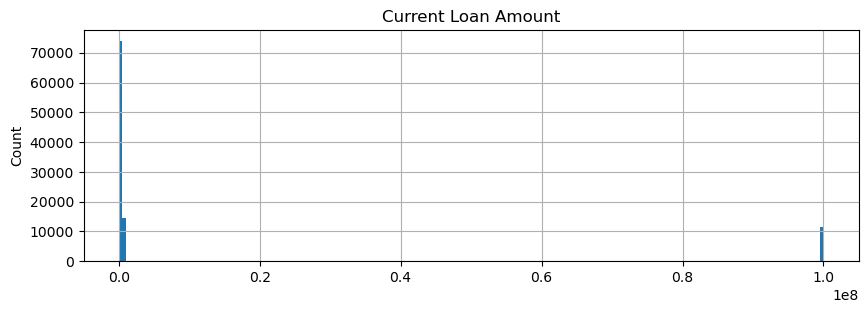

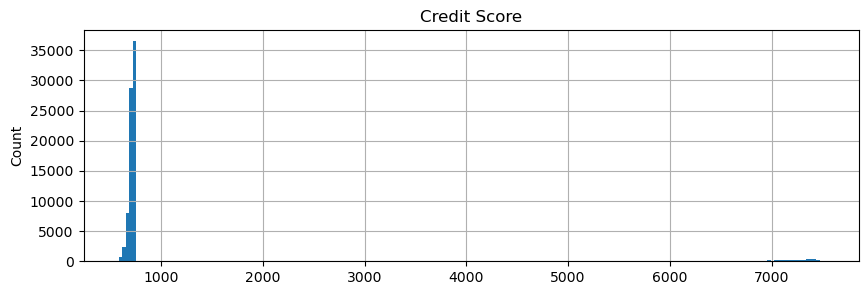

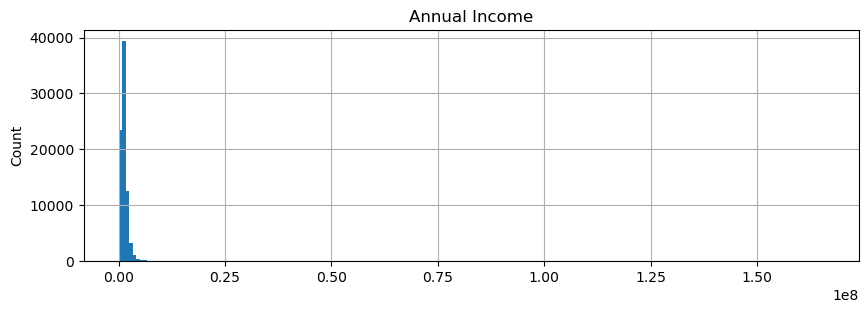

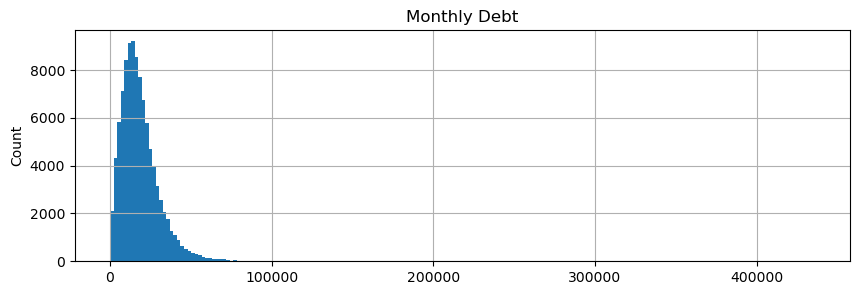

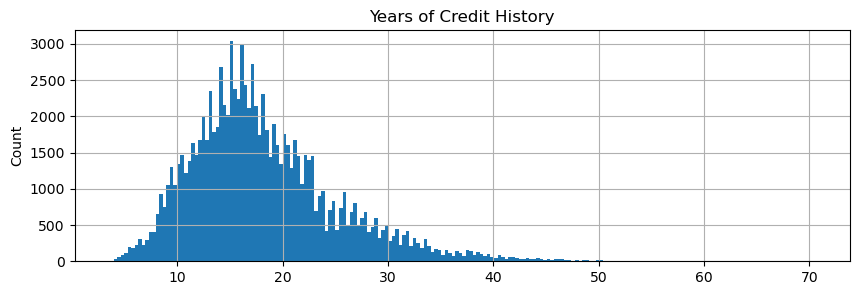

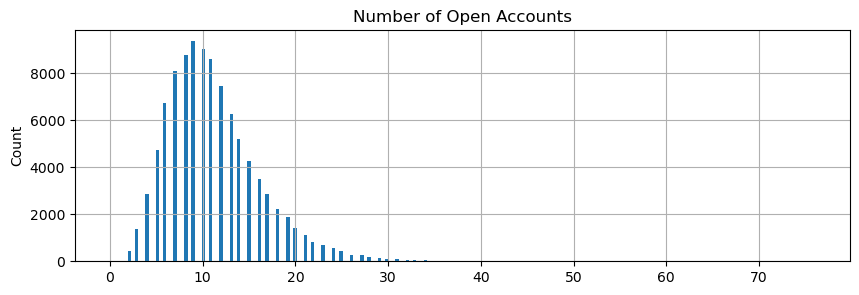

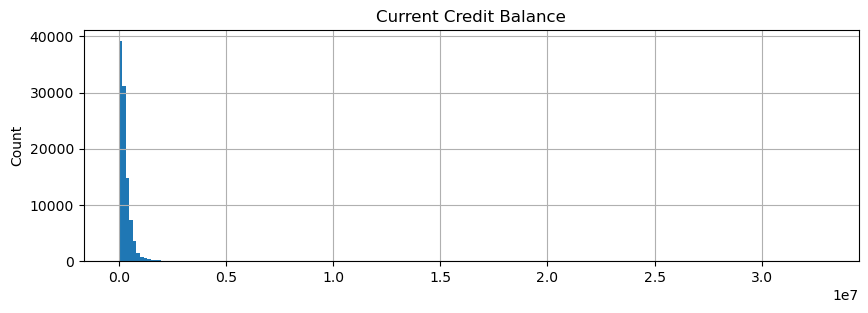

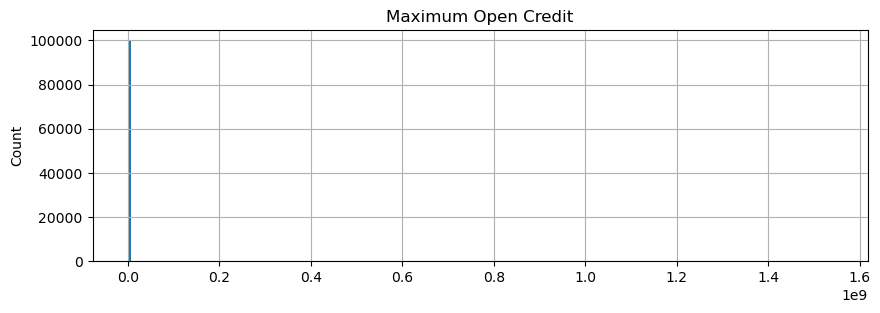

In [33]:
for feature in continuous_feature:
    data = loan.copy()
    plt.figure(figsize=(10, 3))
    data[feature].hist(bins=200)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

#### Section 2-3: Categorical Variables

In [34]:
categorical_features = [feature for feature in loan.columns if loan[feature].dtypes =='O']
categorical_features

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

In [35]:
# Identify categorical columns 
categorical_cols = loan.select_dtypes(exclude=[np.number])
print(categorical_cols.columns)

Index(['Loan Status', 'Term', 'Years in current job', 'Home Ownership',
       'Purpose'],
      dtype='object')


In [36]:
for feature in categorical_features:
    print('The feature is: *{}* and number of categories are: {}'.format(feature, loan[feature].unique()))
    print('--'*10)

The feature is: *Loan Status* and number of categories are: ['Fully Paid' 'Charged Off' nan]
--------------------
The feature is: *Term* and number of categories are: ['Short Term' 'Long Term' nan]
--------------------
The feature is: *Years in current job* and number of categories are: ['8 years' '10+ years' '3 years' '5 years' '< 1 year' '2 years' '4 years'
 '9 years' '7 years' '1 year' nan '6 years']
--------------------
The feature is: *Home Ownership* and number of categories are: ['Home Mortgage' 'Own Home' 'Rent' 'HaveMortgage' nan]
--------------------
The feature is: *Purpose* and number of categories are: ['Home Improvements' 'Debt Consolidation' 'Buy House' 'other'
 'Business Loan' 'Buy a Car' 'major_purchase' 'Take a Trip' 'Other'
 'small_business' 'Medical Bills' 'wedding' 'vacation'
 'Educational Expenses' 'moving' 'renewable_energy' nan]
--------------------


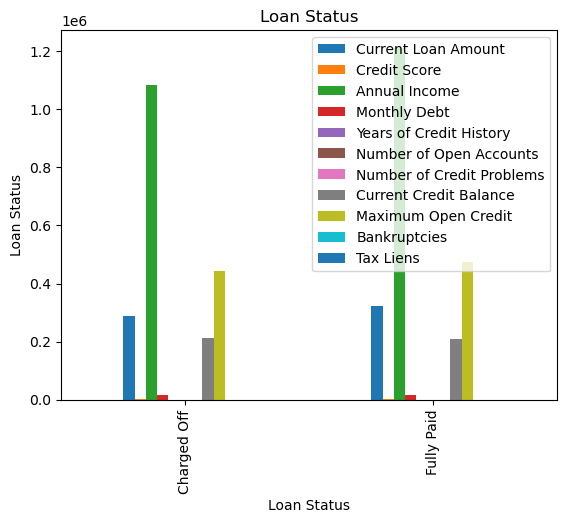

In [37]:
for feature in categorical_features:
    data = loan.copy()
    data.groupby(data['Loan Status']).median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Loan Status')
    plt.title(feature)
    plt.show()
    break

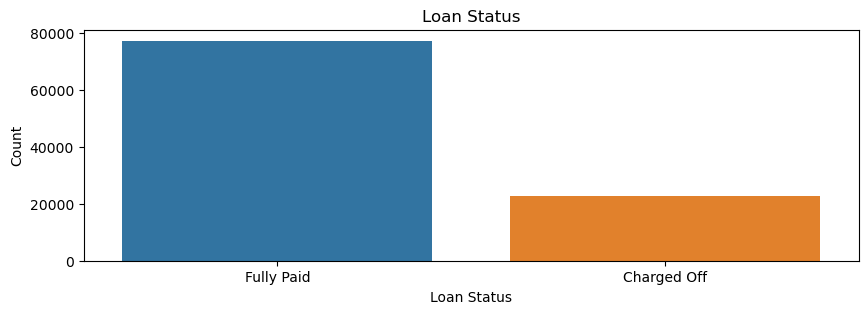

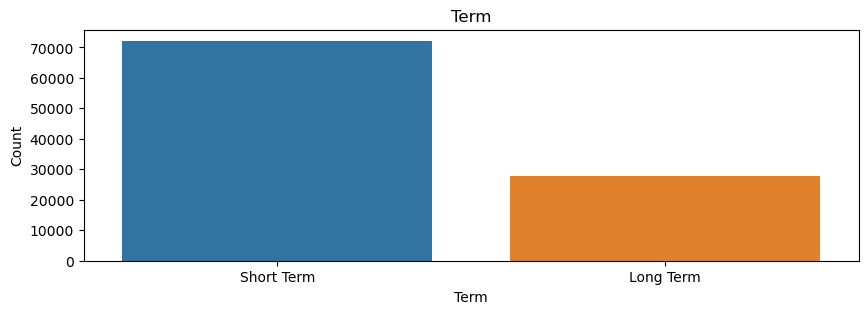

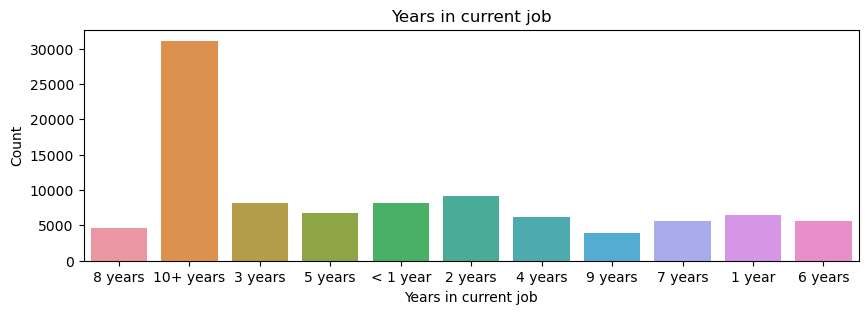

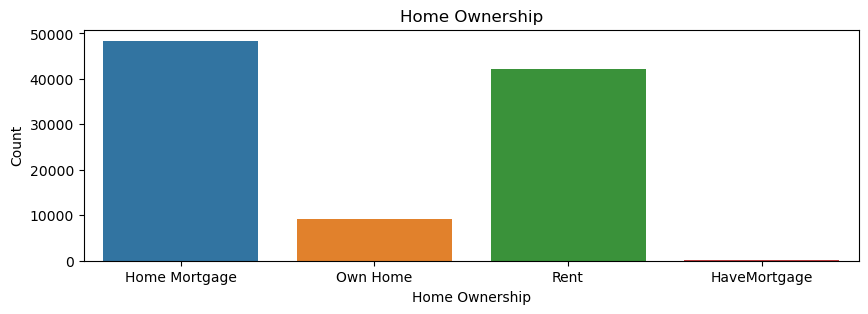

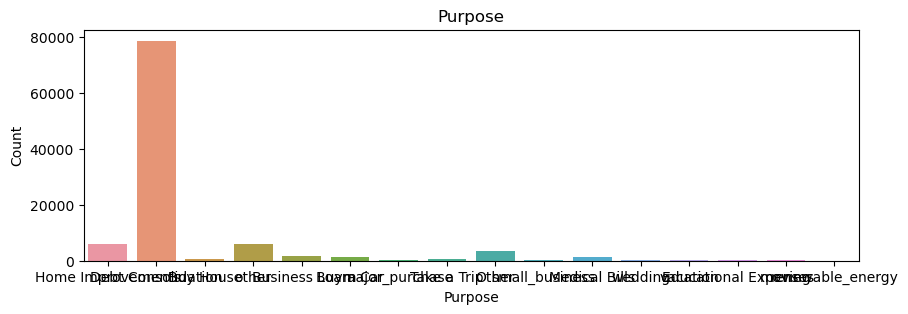

In [38]:
for feature in categorical_features:
    data = loan.copy()
    plt.figure(figsize=(10, 3))
    sns.countplot(x=data[feature], data= data)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

# Section 3: Feature Engineering

Missing Value Treatment
Missing data can have a severe impact on building predictive models because the missing values might be contain
some vital information which could help in making better predictions. So, it becomes imperative to carry out
missing data imputation. There are different methods to treat missing values based on the problem and the data.
Some of the common techniques are as follows:
1. Deletion of rows: In train dataset, observations having missing values in any variable are deleted. The
downside of this method is the loss of information and drop in prediction power of model.
2. Mean/Median/Mode Imputation: In case of continuous variable, missing values can be replaced with mean
or median of all known values of that variable. For categorical variables, we can use mode of the given
values to replace the missing values.
3. Building Prediction Model: We can even make a predictive model to impute missing data in a variable.
Here we will treat the variable having missing data as the target variable and the other variables as
predictors. We will divide our data into 2 datasets—one without any missing value for that variable and the
other with missing values for that variable. The former set would be used as training set to build the
predictive model and it would then be applied to the latter set to predict the missing values.

**Most of the times the given features in a dataset are not enough to give satisfactory predictions. In such cases, we
have to create new features which might help in improving the model’s performance. Let’s try to create some new
features for our dataset.**

In [39]:
loan['Loan Status'] = loan['Loan Status'].map({'Fully Paid':1,'Charged Off' : 0})

In [40]:
# Divide by class
df_class_0 = loan[loan['Loan Status'] == 0]
df_class_1 = loan[loan['Loan Status'] == 1]
df_class_0

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,0.0,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
7,0.0,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,15.0,0.0,193306.0,864204.0,0.0,0.0
16,0.0,653004.0,Long Term,NaN,NaN,7 years,Home Mortgage,Debt Consolidation,14537.09,20.5,9.0,0.0,302309.0,413754.0,0.0,0.0
20,0.0,317108.0,Long Term,687.0,1133274.0,8 years,Rent,Debt Consolidation,9632.81,17.4,4.0,0.0,60287.0,126940.0,0.0,0.0
22,0.0,153252.0,Short Term,714.0,1890690.0,2 years,Rent,Debt Consolidation,21900.35,15.7,12.0,0.0,891594.0,1081014.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99963,0.0,380204.0,Short Term,728.0,1046805.0,NaN,Own Home,Debt Consolidation,32625.28,16.9,8.0,0.0,268964.0,415800.0,0.0,0.0
99975,0.0,274076.0,Short Term,736.0,709650.0,10+ years,Rent,Debt Consolidation,4204.70,35.3,13.0,0.0,102866.0,844712.0,0.0,0.0
99981,0.0,666666.0,Short Term,725.0,3838380.0,7 years,Home Mortgage,Debt Consolidation,48939.44,12.4,18.0,0.0,507414.0,1004322.0,0.0,0.0
99988,0.0,309474.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0


#### Section 3-1: Handling Missing Vlaues

In [41]:
loan.isnull().sum()

Loan Status                    514
Current Loan Amount            514
Term                           514
Credit Score                 19668
Annual Income                19668
Years in current job          4736
Home Ownership                 514
Purpose                        514
Monthly Debt                   514
Years of Credit History        514
Number of Open Accounts        514
Number of Credit Problems      514
Current Credit Balance         514
Maximum Open Credit            516
Bankruptcies                   718
Tax Liens                      524
dtype: int64

Looking at the table above majority of the attribute have excatly 514 data entry missing, we will
investigate and see if droping those row will be a good idea.

In [42]:
loan.tail(530)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
99984,1.0,347468.0,Short Term,691.0,1192307.0,10+ years,Rent,Debt Consolidation,30204.87,21.9,17.0,0.0,331474.0,433686.0,0.0,0.0
99985,1.0,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,25.0,0.0,387410.0,1705616.0,0.0,0.0
99986,1.0,781022.0,Short Term,741.0,2582404.0,6 years,Home Mortgage,Debt Consolidation,51648.08,26.3,25.0,0.0,669180.0,2299198.0,0.0,0.0
99987,1.0,277882.0,Short Term,711.0,867407.0,10+ years,Own Home,Debt Consolidation,23275.19,29.7,11.0,1.0,100719.0,204600.0,0.0,0.0
99988,0.0,309474.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.9,15.0,0.0,225872.0,892606.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
loan.drop(loan.tail(514).index, inplace=True)

In this part we try to filling categorical missing data.

In [44]:
loan.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [45]:
loan.interpolate(inplace=True)

In [46]:
loan.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job         4222
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [47]:
loan['Years in current job'].describe()

count         95778
unique           11
top       10+ years
freq          31121
Name: Years in current job, dtype: object

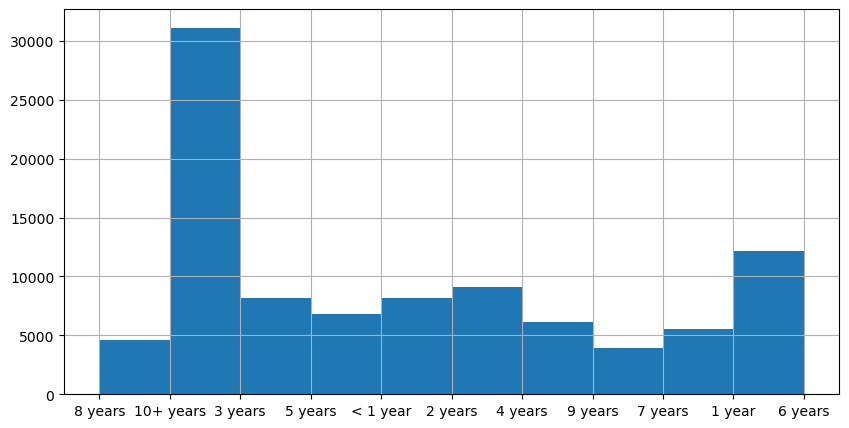

In [48]:
loan['Years in current job'].hist(figsize=(10, 5));

In [49]:
loan['Years in current job'].fillna('10+ years', inplace=True)

In [50]:
loan.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [51]:
loan['Home Ownership'].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

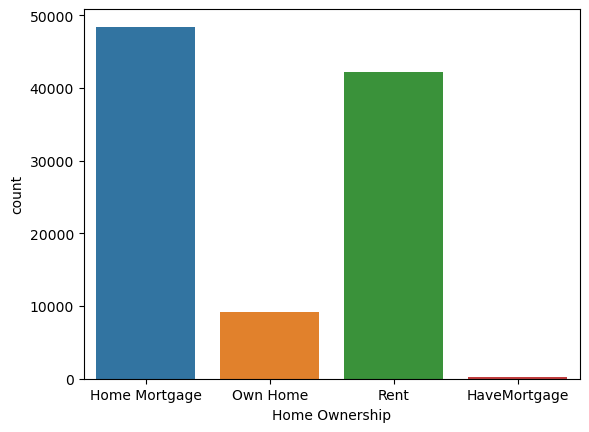

In [52]:
sns.countplot(x='Home Ownership', data=loan);

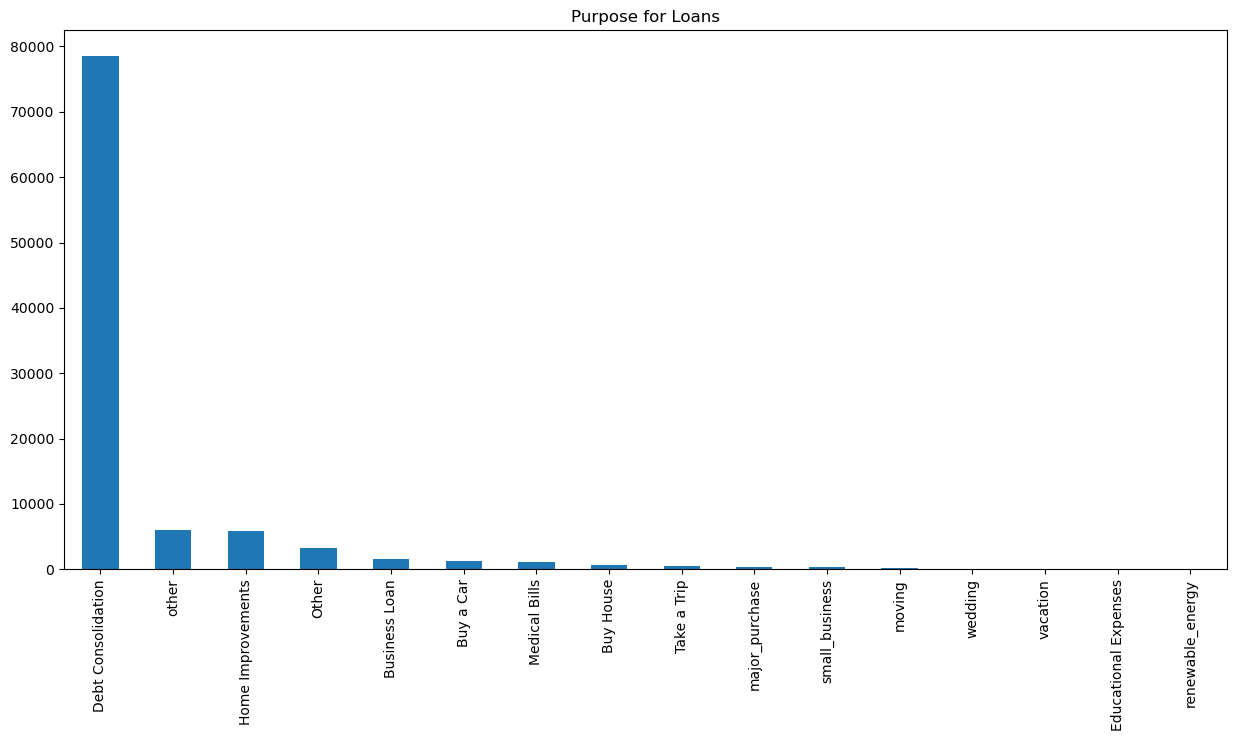

In [53]:
loan['Purpose'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                    title="Purpose for Loans", figsize=(15,7));

In [54]:
loan['Years in current job']=loan['Years in current job'].str.extract(r"(\d+)")
loan['Years in current job'] =loan['Years in current job'].astype(float)

In [55]:
loan['Years in current job'].unique()

array([ 8., 10.,  3.,  5.,  1.,  2.,  4.,  9.,  7.,  6.])

In [56]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  float64
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  float64
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        100

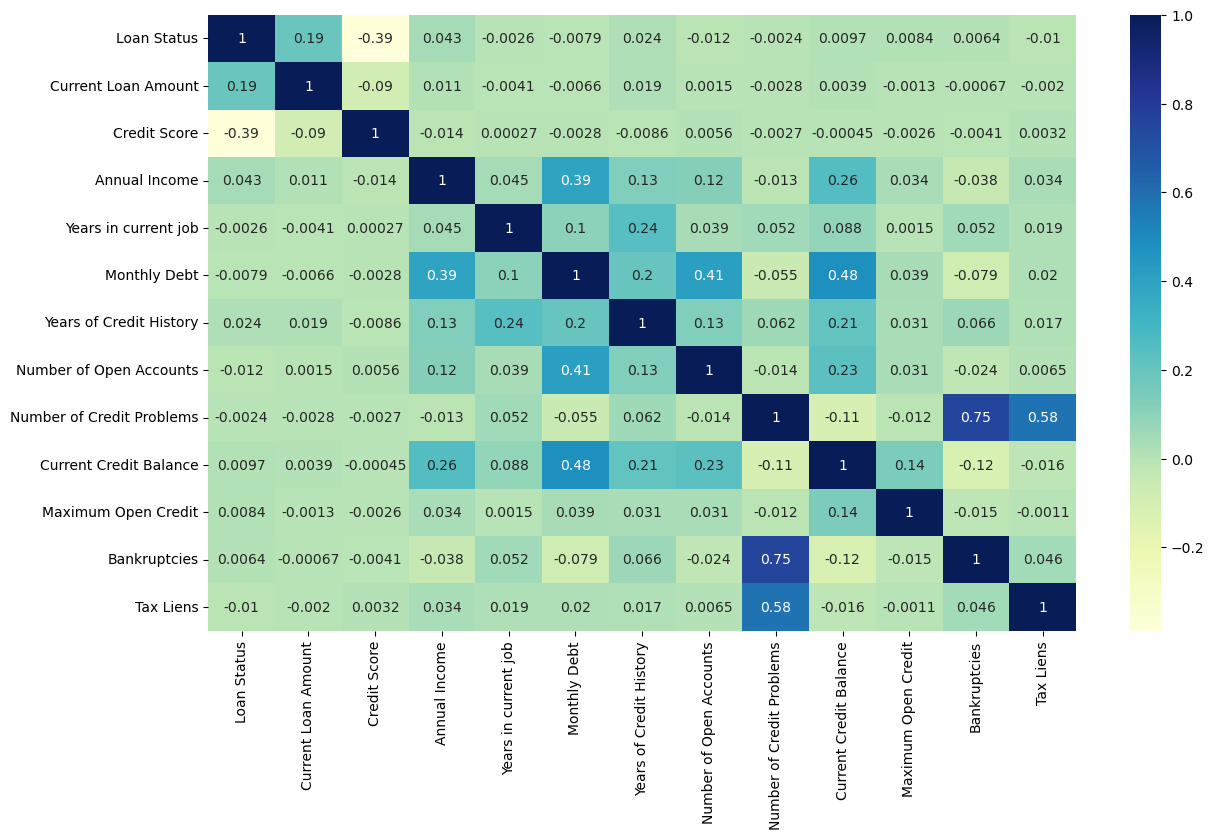

In [57]:
plt.figure(figsize=(14,8))
sns.heatmap(loan.corr(), annot=True, cmap="YlGnBu");

* To understand the correlation plot: it creates a relation between 2 variables and checks if it's proportional(higher than 0.5) or inversely proportional (less than -0.5) , or no relation (close to zero)
* Understanding the correlation between columns helps you make a better model as the insertion of lesser important columns will actually cause bias or corrupt the model.
* We found this:
- Bankruptcy has a high correlation with number of credit problems as the bankrupt bank account is probably immeditely frozen after a bankruptcy.
- Tax liens also have a high correlation with number of credit problems.
- Monthly debt has a high correlation with both, current credit balance, annual income and number of open accounts.


In [58]:
loan.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

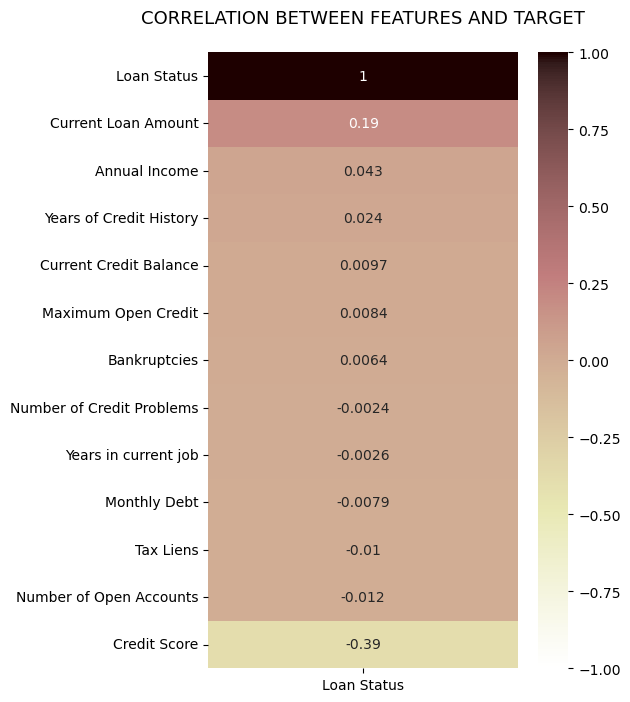

In [59]:
# let's see correlation with our target
plt.figure(figsize=(5, 8))
heatmap = sns.heatmap(loan.corr()[['Loan Status']].sort_values( by='Loan Status',ascending=False), vmin=-1, vmax=1, annot=True,
                      cmap = 'pink_r')
plt.title('CORRELATION BETWEEN FEATURES AND TARGET\n', loc='center', fontsize=13);
plt.show()

- we can see term and credit score have the highest correlation with our target.

#### Section 3-2: Handling Categorical Value

most of records in which Bankruptcies is missing have Number of Credit Problems equal to zero :
and due to strong correlation between Number of Credit Problems and bankrupcies : I will fill them with 0

In [60]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  float64
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  float64
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        100

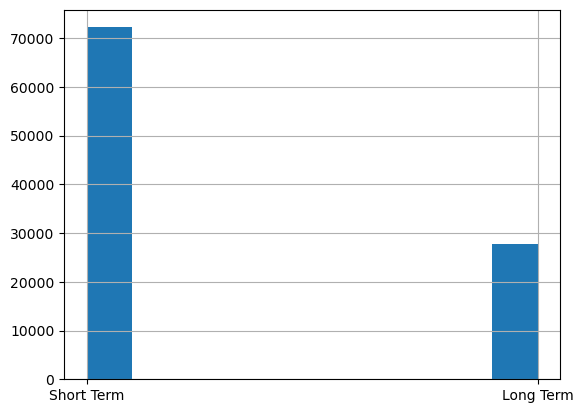

In [61]:
loan['Term'].hist();

In [62]:
loan['Term'] = loan['Term'].map({'Short Term':1,'Long Term' : 0})

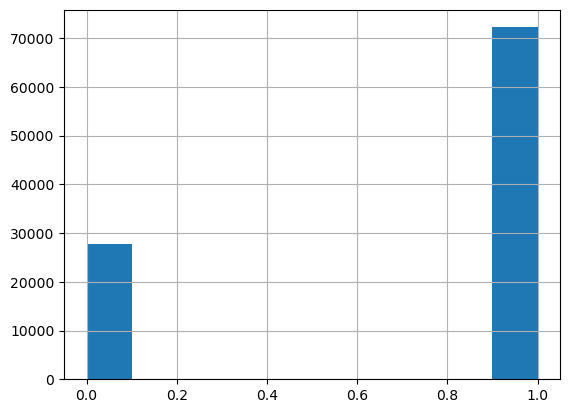

In [63]:
loan['Term'].hist();

In [64]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  float64
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  int64  
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  float64
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        100

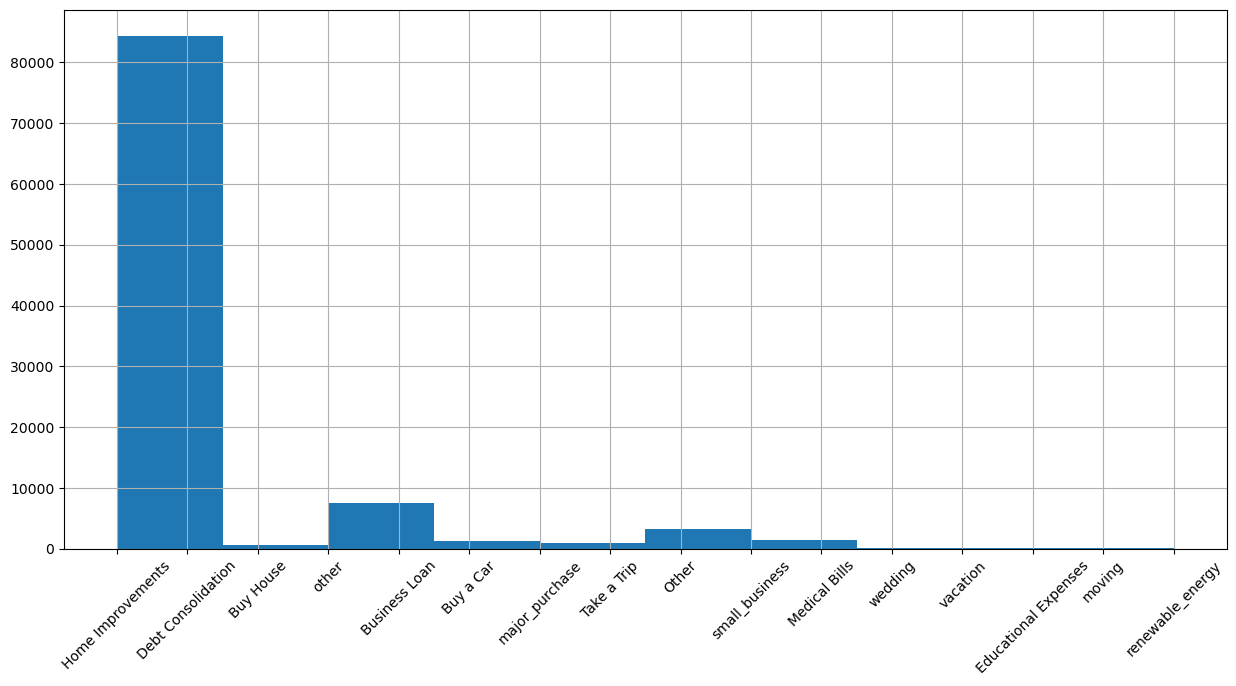

In [65]:
loan['Purpose'].hist(figsize=(15, 7))
plt.xticks(rotation= 45);

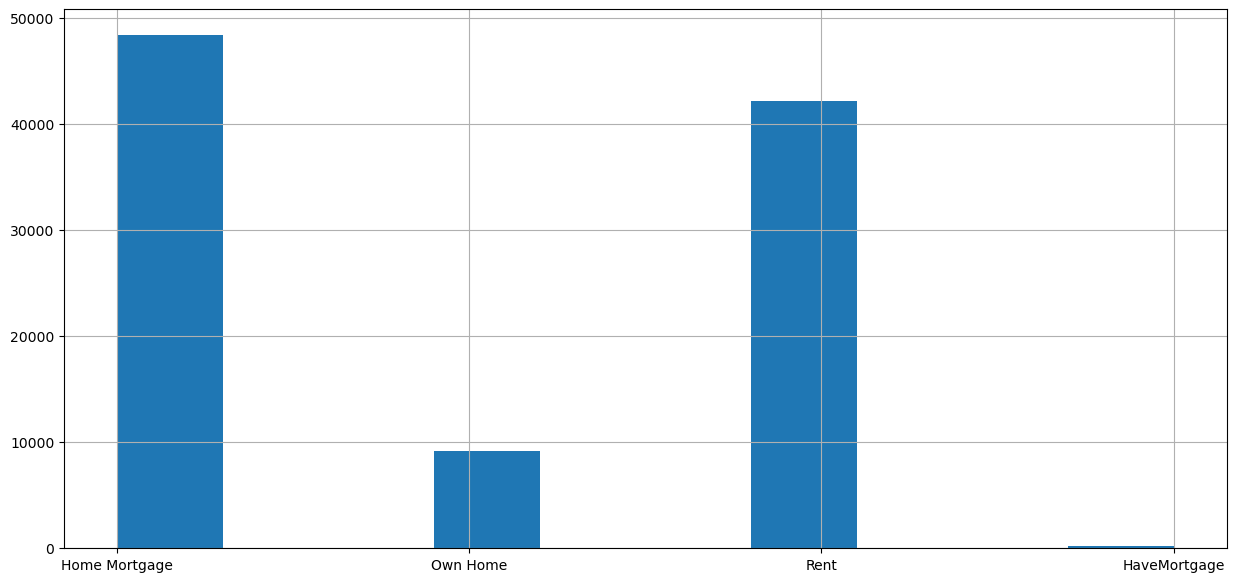

In [66]:
loan['Home Ownership'].hist(figsize=(15, 7));

In [67]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  float64
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  int64  
 3   Credit Score               100000 non-null  float64
 4   Annual Income              100000 non-null  float64
 5   Years in current job       100000 non-null  float64
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        100

In [68]:
loan.shape

(100000, 16)

Encoding Categorical Variables
In this stage, we will convert our categorical variables into numerical ones. We will use 2 techniques — Label
Encoding and One Hot Encoding.
1. Label encoding simply means converting each category in a variable to a number. It is more suitable for
ordinal variables — categorical variables with some order.
2. In One hot encoding, each category of a categorical variable is converted into a new bunary column (1/0).
We will use both the encoding techniques.

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [70]:
cat_data = ['Home Ownership','Purpose']
transformer = ColumnTransformer([('transform', OneHotEncoder(), cat_data )],  remainder = 'passthrough')
tra=  np.array(transformer.fit_transform(loan), dtype = np.float64)

In [71]:
tra= pd.DataFrame(tra)

In [72]:
tra

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


here's a step-by-step breakdown of the code with examples:

cat_data = ['Loan Status','Term','Home Ownership','Purpose']:
This line defines a list of categorical features in the dataset. These are features that can take on a limited number of distinct values or categories. In this case, the four categorical features are:

Loan Status
Term
Home Ownership
Purpose
Example: If we have a loan application dataset, "Loan Status" could be "Approved", "Denied", or "Pending"; "Term" could be "Short-term", "Medium-term", or "Long-term"; "Home Ownership" could be "Owned", "Rented", or "Other"; and "Purpose" could be "Personal", "Business", or "Mortgage".

transformer = ColumnTransformer([('transform', OneHotEncoder(), cat_data )], remainder = 'passthrough'):
This line creates a transformer object called transformer using the ColumnTransformer class from scikit-learn library. It takes two arguments:

A list of tuples, where each tuple contains three elements:
The name of the transformation (string)
The transformer object (OneHotEncoder in this case)
The list of columns to apply the transformation to (cat_data)
The remainder parameter specifies how to handle the remaining columns that are not specified in the list of tuples. In this case, we set it to 'passthrough', which means that the remaining columns will be passed through unchanged.
Example: Think of the transformer object like a factory production line. Each tuple in the list represents a different machine on the production line. The first element of the tuple is the name of the machine (e.g., "transform"). The second element is the actual machine (e.g., an OneHotEncoder instance). The third element is the input material that the machine will work on (e.g., the categorical feature columns defined in cat_data). The remainder parameter decides what happens to the rest of the input materials that are not specifically assigned to a machine (e.g., the numerical features). In our case, we're saying that the remaining columns should be left alone and just passed through.

tra=np.array(transformer.fit_transform(training), dtype=np.float):
This line applies the transformations defined in the transformer object to the training data and stores the result in a NumPy array called tra. Specifically, it calls the fit_transform() method of the transformer object, passing in the training data (training) as the argument. The fit_transform() method fits the transformers to the training dathere's a step-by-step breakdown of the code with examples:

cat_data = ['Loan Status','Term','Home Ownership','Purpose']:
This line defines a list of categorical features in the dataset. These are features that can take on a limited number of distinct values or categories. In this case, the four categorical features are:

Loan Status
Term
Home Ownership
Purpose
Example: If we have a loan application dataset, "Loan Status" could be "Approved", "Denied", or "Pending"; "Term" could be "Short-term", "Medium-term", or "Long-term"; "Home Ownership" could be "Owned", "Rented", or "Other"; and "Purpose" could be "Personal", "Business", or "Mortgage".

transformer = ColumnTransformer([('transform', OneHotEncoder(), cat_data )], remainder = 'passthrough'):
This line creates a transformer object called transformer using the ColumnTransformer class from scikit-learn library. It takes two arguments:

A list of tuples, where each tuple contains three elements:
The name of the transformation (string)
The transformer object (OneHotEncoder in this case)
The list of columns to apply the transformation to (cat_data)
The remainder parameter specifies how to handle the remaining columns that are not specified in the list of tuples. In this case, we set it to 'passthrough', which means that the remaining columns will be passed through unchanged.
Example: Think of the transformer object like a factory production line. Each tuple in the list represents a different machine on the production line. The first element of the tuple is the name of the machine (e.g., "transform"). The second element is the actual machine (e.g., an OneHotEncoder instance). The third element is the input material that the machine will work on (e.g., the categorical feature columns defined in cat_data). The remainder parameter decides what happens to the rest of the input materials that are not specifically assigned to a machine (e.g., the numerical features). In our case, we're saying that the remaining columns should be left alone and just passed through.

tra=np.array(transformer.fit_transform(training), dtype=np.float):
This line applies the transformations defined in the transformer object to the training data and stores the result in a NumPy array called tra. Specifically, it calls the fit_transform() method of the transformer object, passing in the training data (training) as the argument. The fit_transform() method fits the transformers to the training data and then applies the transformations to produce the transformed data. Finally, the result is converted into a NumPy array with floating-point numbers (dtype = np.float).

Example: Continuing the production line analogy, this line is like running the raw materials (the training data) through the machines (the transformers) to produce the final products (the transformed data). Since we're working with data, the machines (transformers) learn how to convert the raw materials (categorical features) into something useful (one-hot encoded representations) while keeping the rest of the materials (numerical features) intact. The resulting products (transformed data) are then packaged into a neat and tidy NumPy array called tra.

The resulting tra array has the same shape as the original training data, but with one important difference – the categorical features have been replaced by one-hot encoded representations. This is useful because machine learning algorithms typically struggle with categorical variables, but one-hot encoding helps to represent these variables in a way that the algorithms can understand.a and then applies the transformations to produce the transformed data. Finally, the result is converted into a NumPy array with floating-point numbers (dtype = np.float).

Example: Continuing the production line analogy, this line is like running the raw materials (the training data) through the machines (the transformers) to produce the final products (the transformed data). Since we're working with data, the machines (transformers) learn how to convert the raw materials (categorical features) into something useful (one-hot encoded representations) while keeping the rest of the materials (numerical features) intact. The resulting products (transformed data) are then packaged into a neat and tidy NumPy array called tra.

The resulting tra array has the same shape as the original training data, but with one important difference – the categorical features have been replaced by one-hot encoded representations. This is useful because machine learning algorithms typically struggle with categorical variables, but one-hot encoding helps to represent these variables in a way that the algorithms can understand.

In [73]:
loan.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [74]:
rename={1:'Paid',0:'Charged Off',2:'Long Term',3:'Short Term',5:'Home Mortgage',6:'Own Home', 7:'Rent',4:'Have Mortage'
        ,13:'Home Improvements', 11:'Debt Consolidation',19:'other', 15:'Other', 17:'major_purchase', 21:'small_business'
        ,14:'Medical Bills', 8:'Business Loan', 9:'Buy House', 10:'Buy a Car', 16:'Take a Trip', 23:'wedding', 22:'vacation'
        ,18:'moving', 12:'Educational Expenses', 20:'renewable energy', 24:"Loan Amount", 25:'credit score'
        ,26:'Annaual InCOME',27:'Years in Job',28:'monthly debt',29:'credit history',30:'Open account',31:'credit Problem'
        ,32:'Current credit balance',33:'Maximum open credit',34:'Bankruptcies',35:'Tax Liens'}

In [75]:
tra.rename(columns=rename, inplace=True)

In [76]:
tra

,Charged Off,Paid,Long Term,Short Term,Have Mortage,Home Mortgage,Own Home,Rent,Business Loan,Buy House,...,Loan Amount,credit score,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [77]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Charged Off             100000 non-null  float64
 1   Paid                    100000 non-null  float64
 2   Long Term               100000 non-null  float64
 3   Short Term              100000 non-null  float64
 4   Have Mortage            100000 non-null  float64
 5   Home Mortgage           100000 non-null  float64
 6   Own Home                100000 non-null  float64
 7   Rent                    100000 non-null  float64
 8   Business Loan           100000 non-null  float64
 9   Buy House               100000 non-null  float64
 10  Buy a Car               100000 non-null  float64
 11  Debt Consolidation      100000 non-null  float64
 12  Educational Expenses    100000 non-null  float64
 13  Home Improvements       100000 non-null  float64
 14  Medical Bills        

now we have to drop one of our new collumn from the new categories we created in other to avoid the dummmy variable trap, we
will drop 'charged off', 'Long Term', 'Have Mortage', 'renewable energy' from our dataset.

In [78]:
tra.drop(columns=['Charged Off', 'Long Term', 'Have Mortage', 'renewable energy'], axis=1, inplace=True)

In [79]:
tra

,Paid,Short Term,Home Mortgage,Own Home,Rent,Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,...,Loan Amount,credit score,Annaual InCOME,Years in Job,monthly debt,credit history,Open account,credit Problem,Current credit balance,Maximum open credit
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


#### Section 3-3: Finding Outliers

Here we want find outliers. Pay attention that outlier just belong to numerical data.

In [80]:
# finding outliers
def Outliers (data,column):
    for col in column.columns:
        mean_ = data[col].mean()
        Sdev_= data[col].std()
        Upper_limit= mean_+ (3*Sdev_)
        lower_limit= mean_- (3*Sdev_) #error 
        out= data[(data[col]>Upper_limit)|(data[col]<lower_limit)].index
    
        data.drop(out ,inplace=True)
    
    return data

In [81]:
num_col = loan.select_dtypes(include=['number'])
num_col

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,1,709.0,1167493.0,8.0,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,1,725.0,1699692.5,10.0,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,1,741.0,2231892.0,8.0,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,0,721.0,806949.0,3.0,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,1,4005.5,851903.0,5.0,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,147070.0,1,725.0,475437.0,7.0,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1.0,99999999.0,1,732.0,1289416.0,1.0,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1.0,103136.0,1,742.0,1150545.0,6.0,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1.0,530332.0,1,746.0,1717524.0,9.0,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [82]:
Outliers(loan, num_col)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,1,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1.0,99999999.0,1,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,0,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,1,4005.5,851903.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
6,1.0,217646.0,1,730.0,1184194.0,1.0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,147070.0,1,725.0,475437.0,7.0,Own Home,other,2202.86,22.3,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,1.0,99999999.0,1,732.0,1289416.0,1.0,Rent,Debt Consolidation,13109.05,9.4,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,1.0,103136.0,1,742.0,1150545.0,6.0,Rent,Debt Consolidation,7315.57,18.8,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,1.0,530332.0,1,746.0,1717524.0,9.0,Rent,Debt Consolidation,9890.07,15.0,8.0,0.0,404225.0,738254.0,0.0,0.0


#### Section 3_4: Random up_sampling

### Let's check the dataset is Balanced or Imbalanced.

In [83]:
# Class count
count_class_1, count_class_0 = loan['Loan Status'].value_counts()
print(count_class_1, count_class_0)

70494 16522


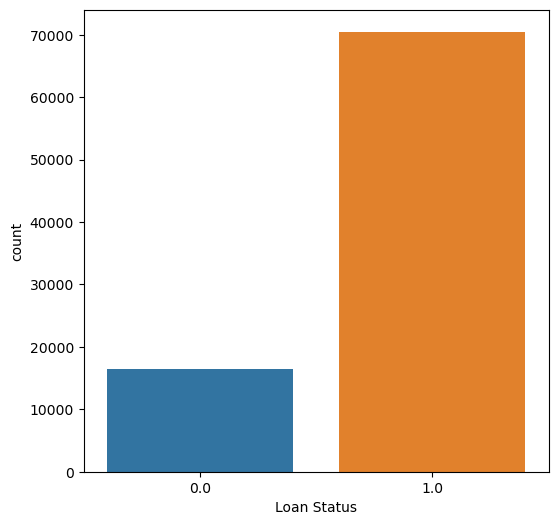

In [84]:
# Let's plot the Unique value counts
plt.figure(figsize=(6, 6))
sns.countplot(x = 'Loan Status', data = loan);

- Hence it is a Imbalanced Dataset. 
- Two-third of Loan_Status is having `Yes` value.
- One-third of Loan_Status is having `No` value.

Two methods for handling Imbalanced Dataset.
- Increase rejected applicants i.e., Loan_Status having `No` values
- Remove accepted applicants i.e., Loan_Status `Yes` values

#### Resampling
- A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Random up-sampling:
1.0    77361
0.0    70494
Name: Loan Status, dtype: int64


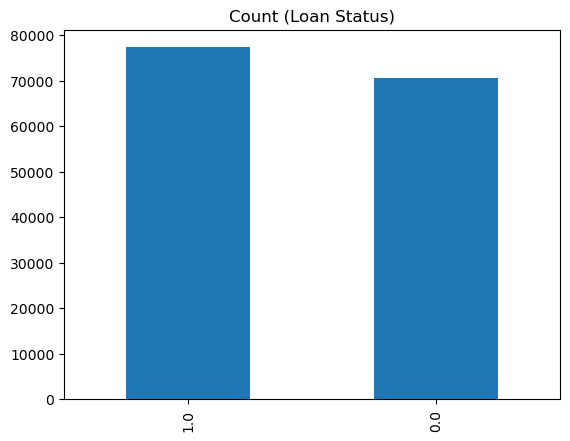

In [85]:
df_class_0_up = df_class_0.sample(count_class_1, replace=True)
df_test_up = pd.concat([df_class_1, df_class_0_up], axis=0)

print('Random up-sampling:')
print(df_test_up['Loan Status'].value_counts())

df_test_up['Loan Status'].value_counts().plot(kind='bar', title='Count (Loan Status)');

In [86]:
loan = df_test_up
loan

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1.0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1.0,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35.0,0.0,229976.0,850784.0,0.0,0.0
2,1.0,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1.0,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1.0,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64078,0.0,158004.0,Short Term,680.0,432117.0,NaN,Own Home,Home Improvements,8534.23,28.3,6.0,0.0,53124.0,349492.0,0.0,0.0
83933,0.0,457292.0,Long Term,715.0,2820930.0,< 1 year,Rent,Debt Consolidation,49131.15,12.9,15.0,0.0,146167.0,867878.0,0.0,0.0
91393,0.0,107756.0,Short Term,7040.0,883918.0,9 years,Rent,other,2791.67,15.1,3.0,0.0,37753.0,215380.0,0.0,0.0
10997,0.0,287210.0,Short Term,715.0,977132.0,5 years,Own Home,Debt Consolidation,7963.66,10.0,9.0,0.0,255246.0,354794.0,0.0,0.0


#### Section 3-5: Feature Scaling

In [87]:
dependent = tra['Paid']
feature = tra.drop(columns=['Paid'])
X_train, X_test, y_train, y_test = train_test_split(feature,dependent, test_size=0.25, random_state=0)
print('The X_train shape is:{} and the X_test shape is:{} while the y_train shape is:{} and the y_test shape is:{}'.format
     (X_train.shape, X_test.shape, y_train.shape, y_test.shape))

The X_train shape is:(75000, 29) and the X_test shape is:(25000, 29) while the y_train shape is:(75000,) and the y_test shape is:(25000,)


In [88]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [89]:
y_train

2606     0.0
57228    0.0
8382     0.0
60281    0.0
48432    0.0
        ... 
21243    1.0
45891    1.0
42613    1.0
43567    0.0
68268    0.0
Name: Paid, Length: 75000, dtype: float64

In [90]:
y_train.to_numpy()
y_test.to_numpy()
y_train

2606     0.0
57228    0.0
8382     0.0
60281    0.0
48432    0.0
        ... 
21243    1.0
45891    1.0
42613    1.0
43567    0.0
68268    0.0
Name: Paid, Length: 75000, dtype: float64

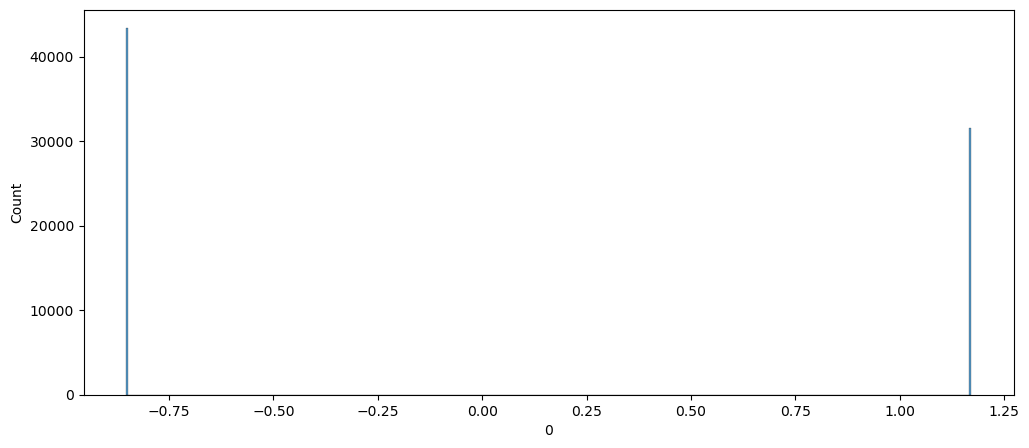

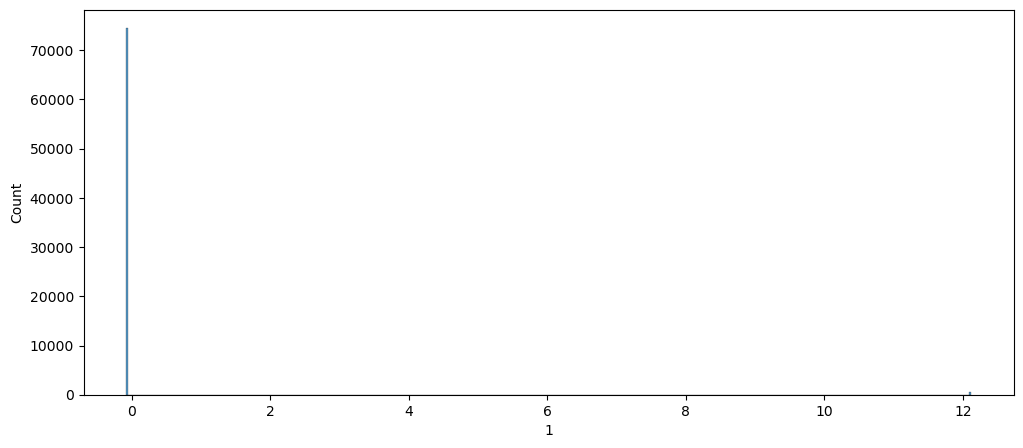

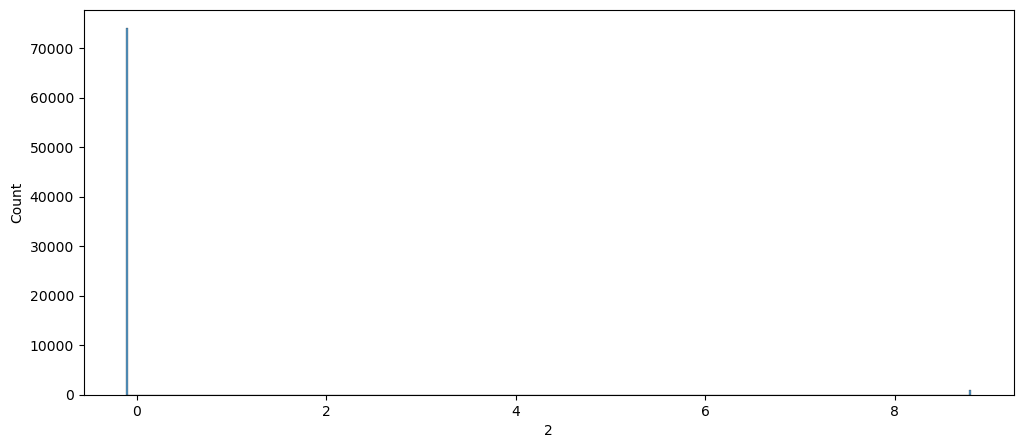

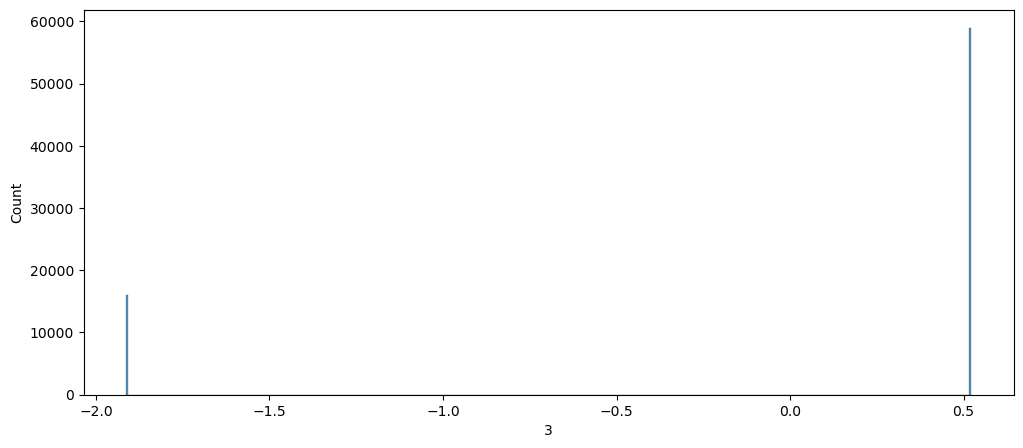

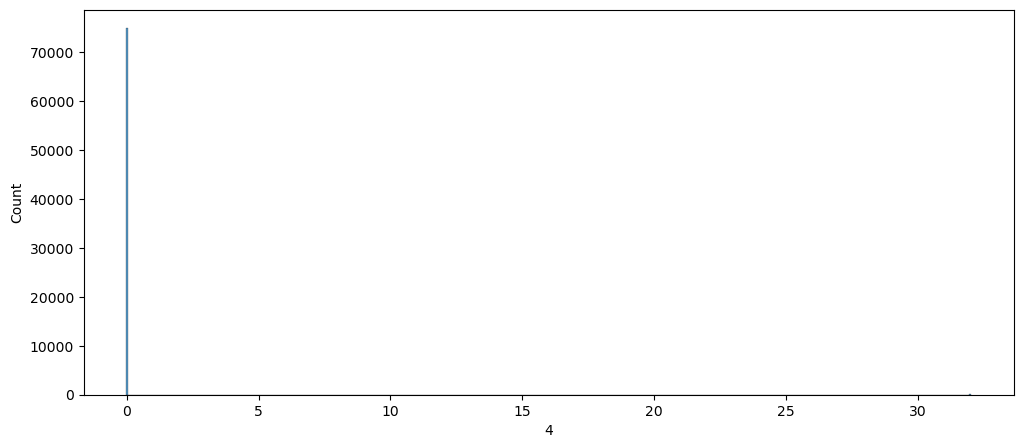

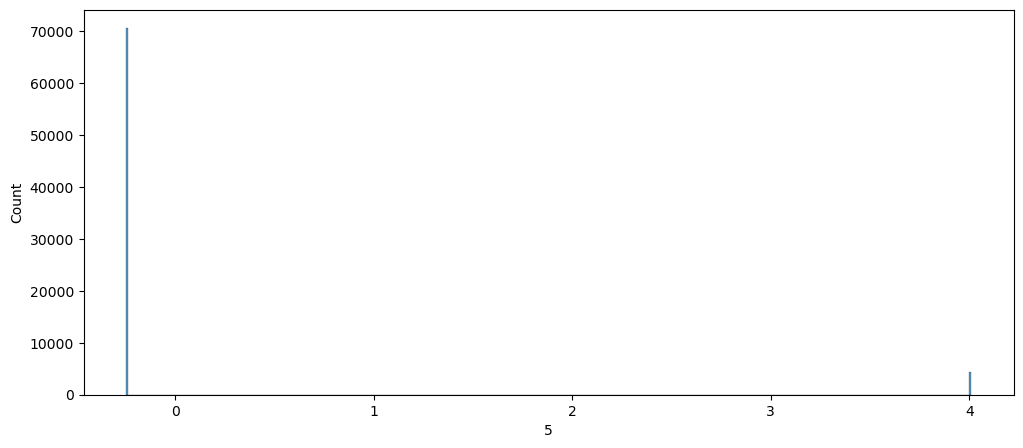

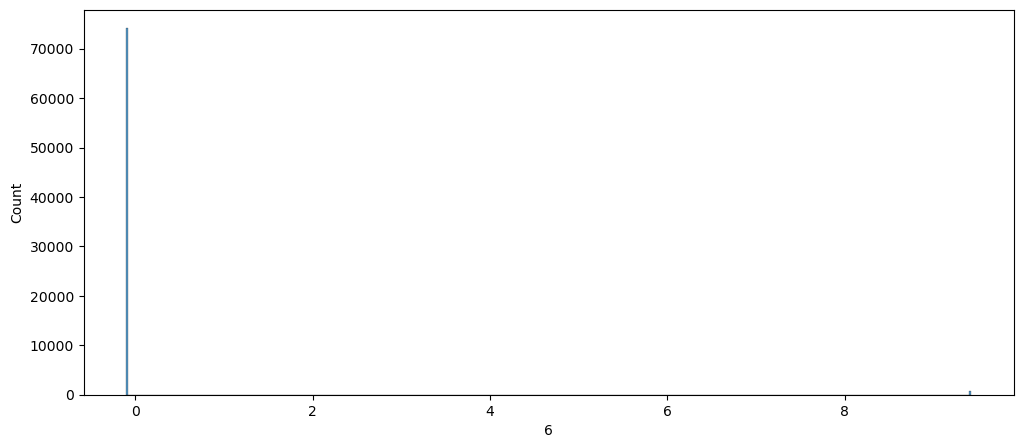

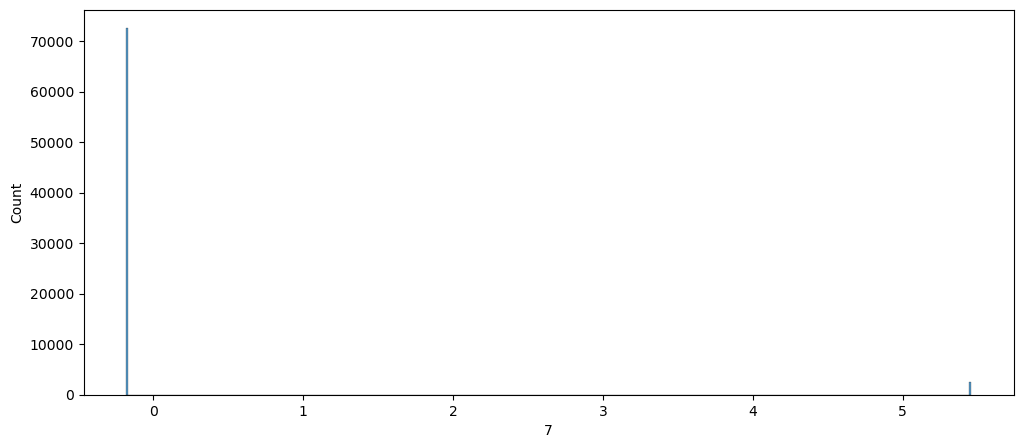

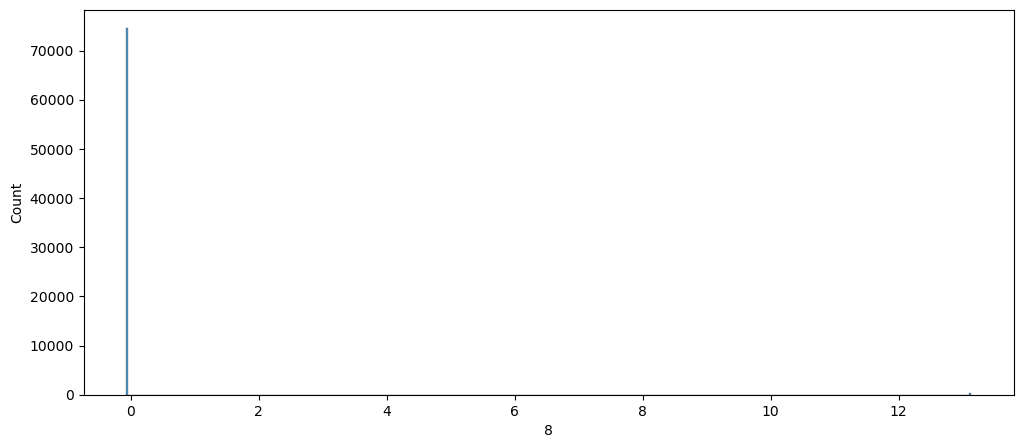

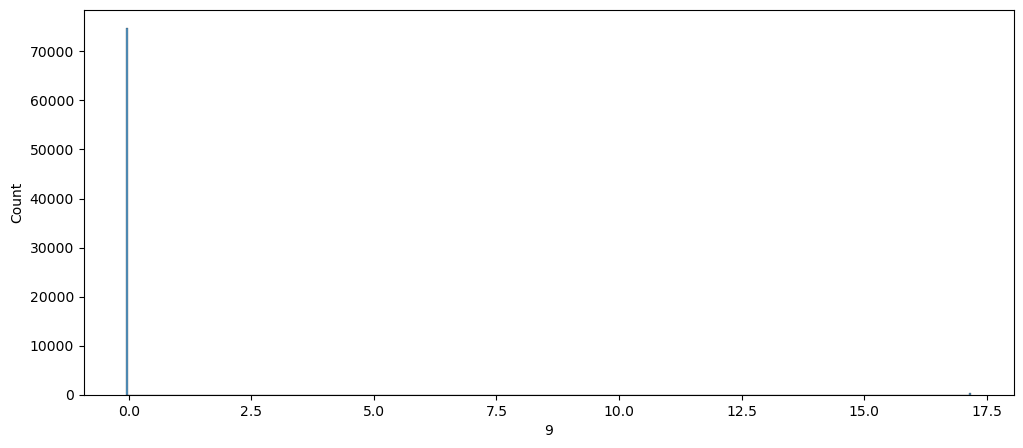

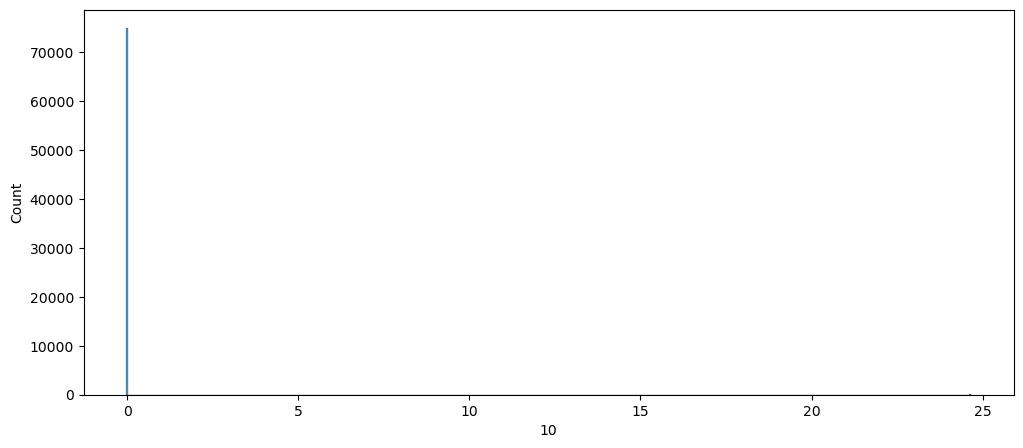

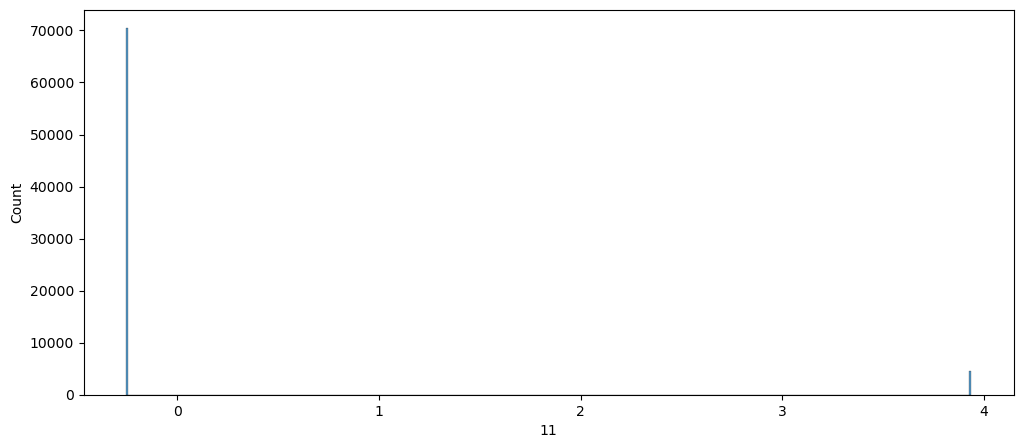

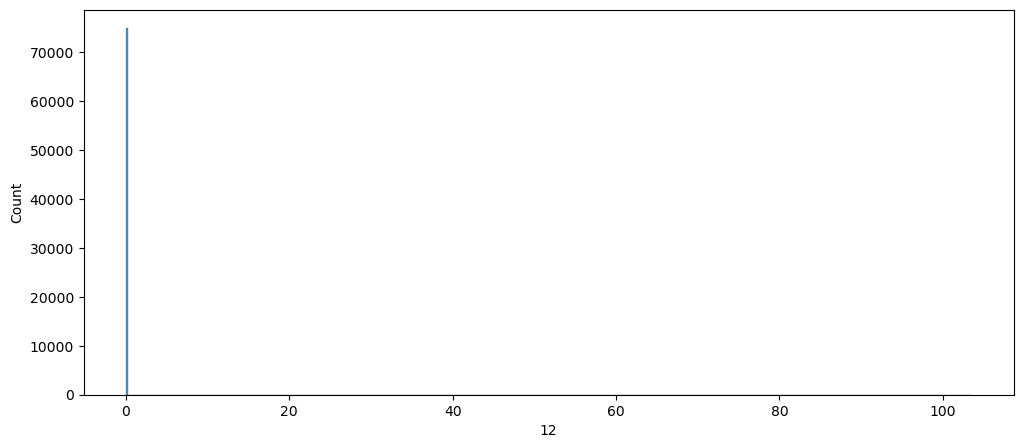

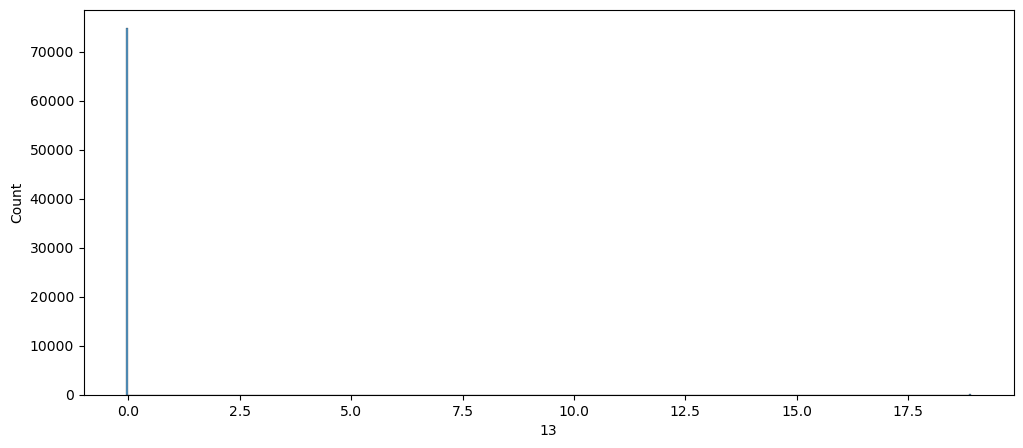

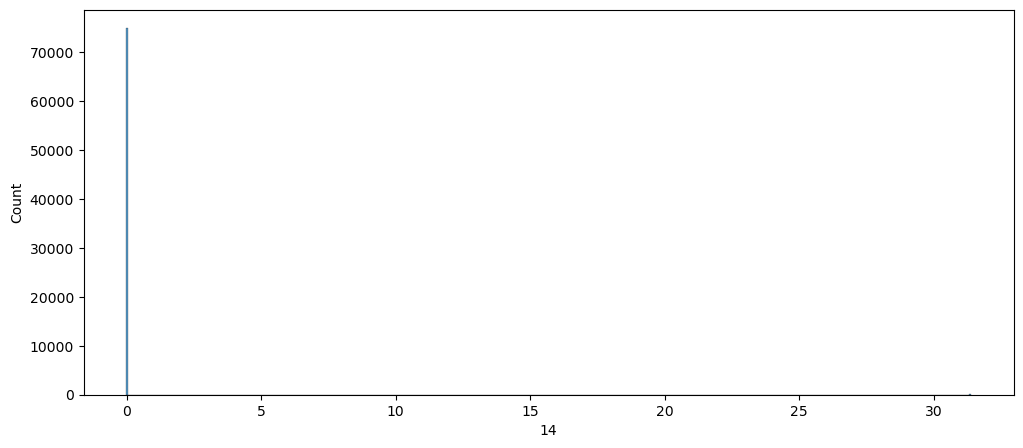

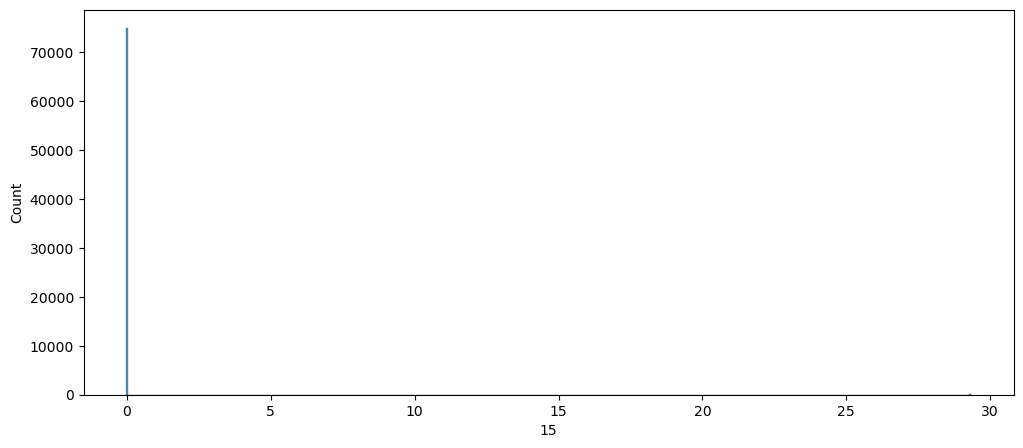

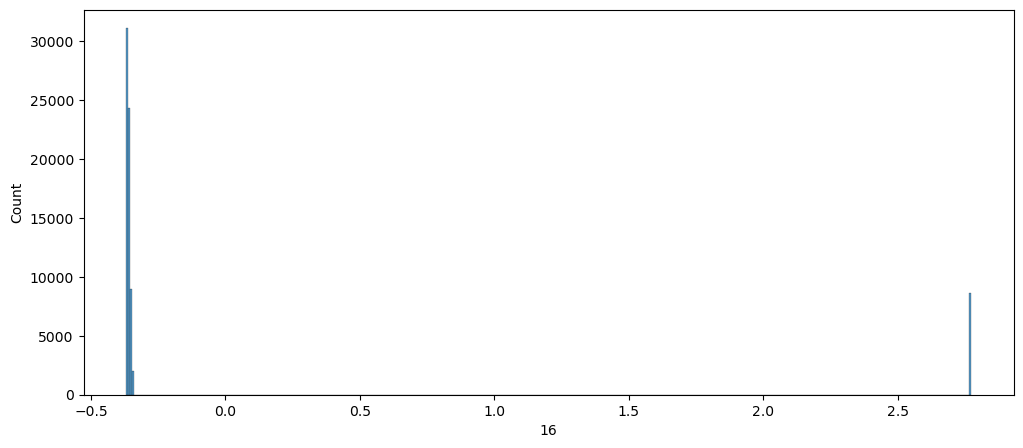

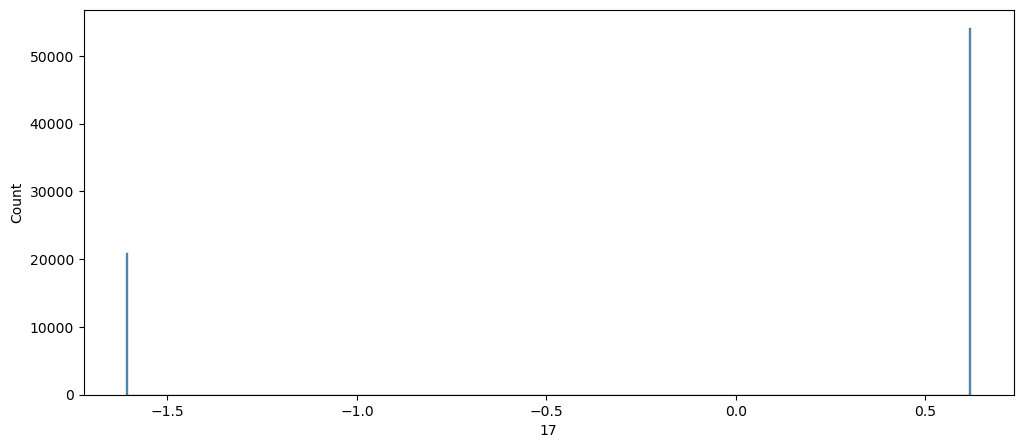

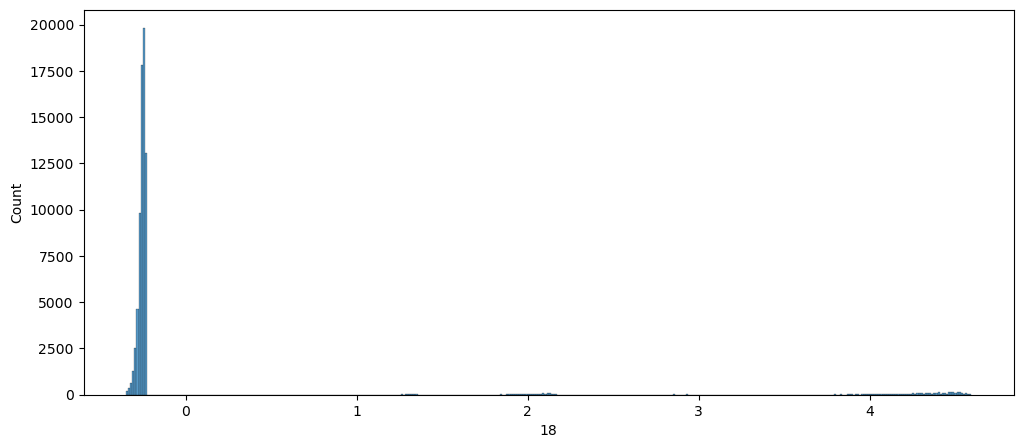

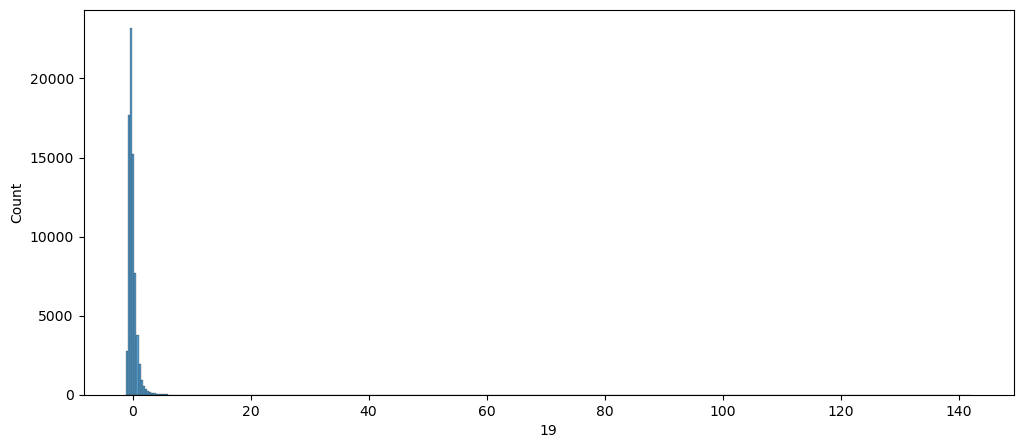

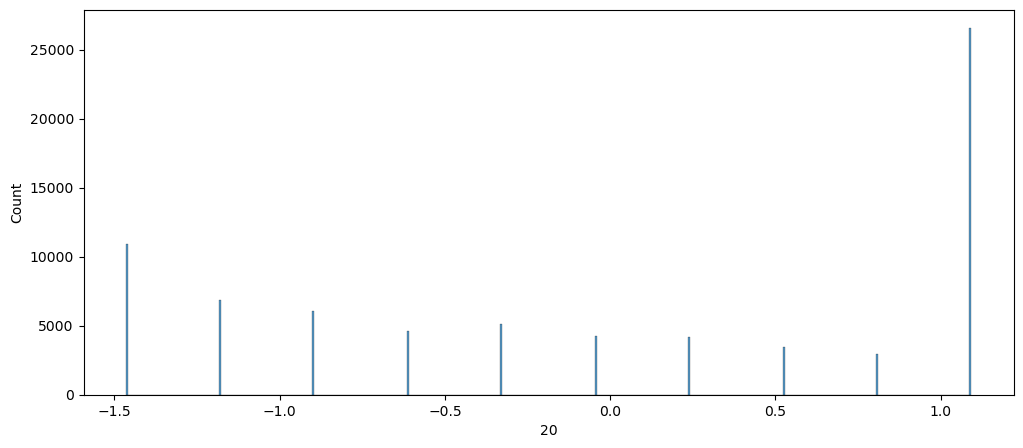

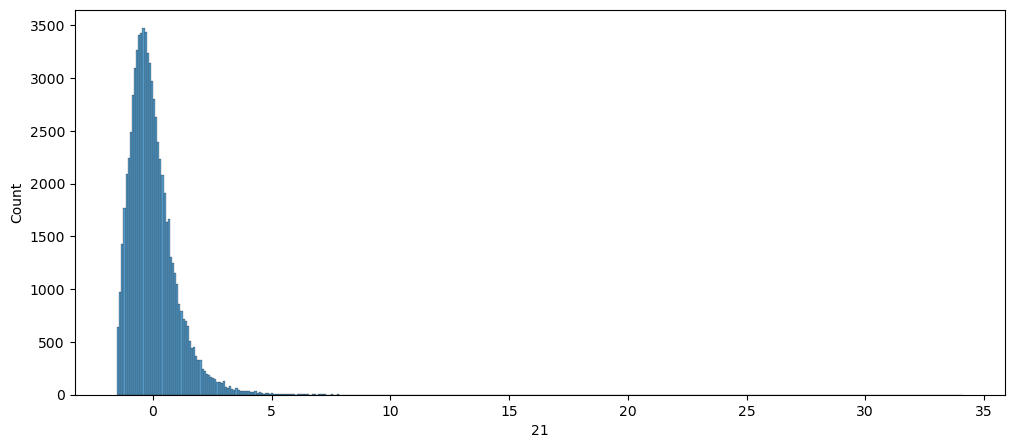

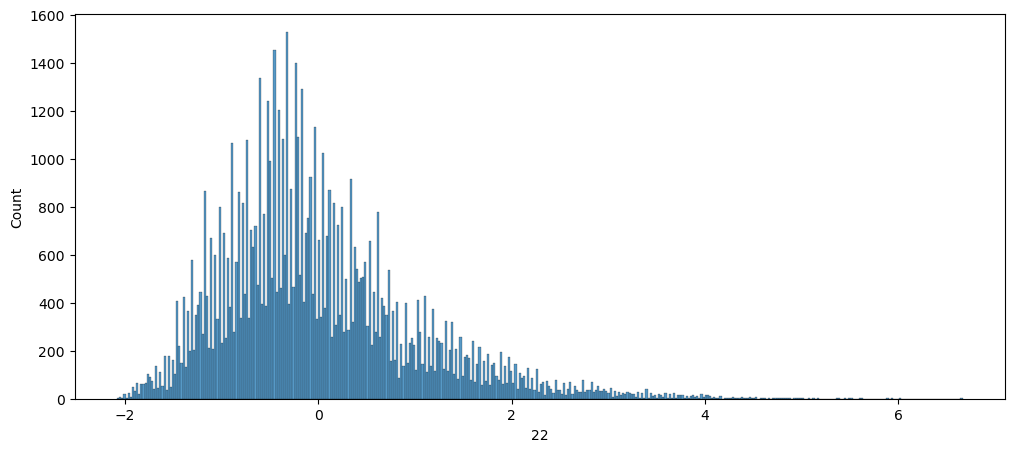

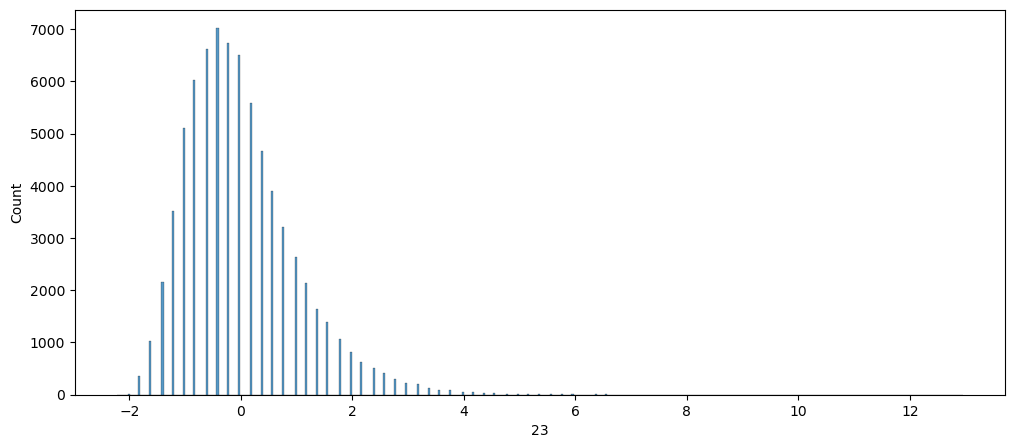

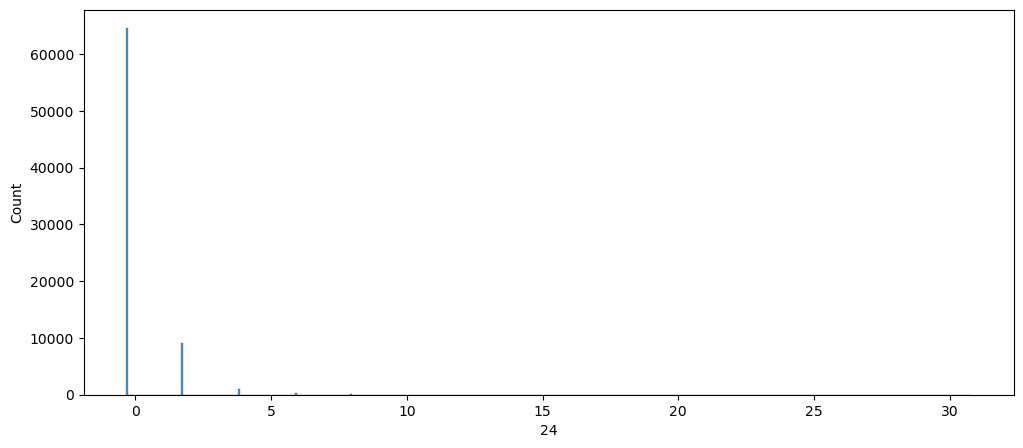

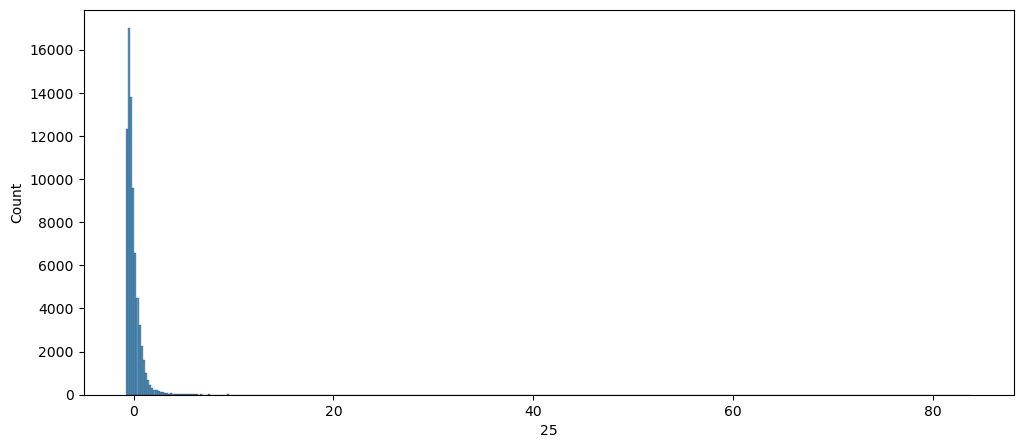

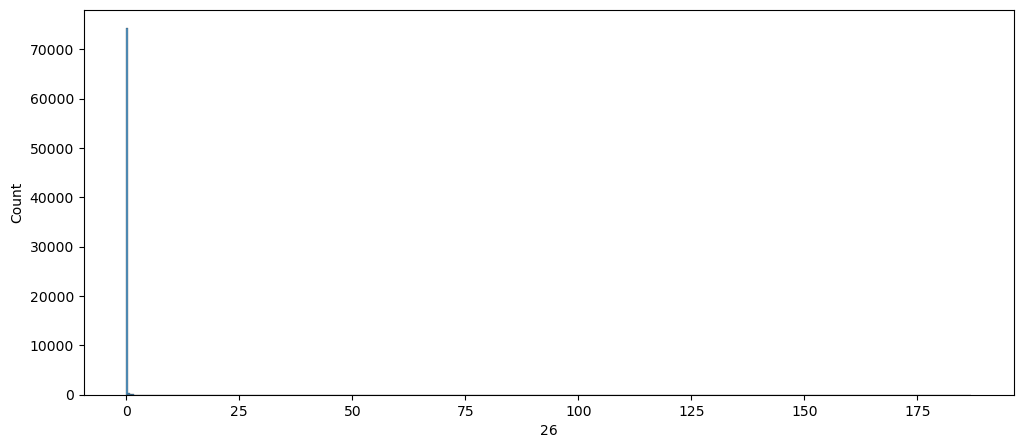

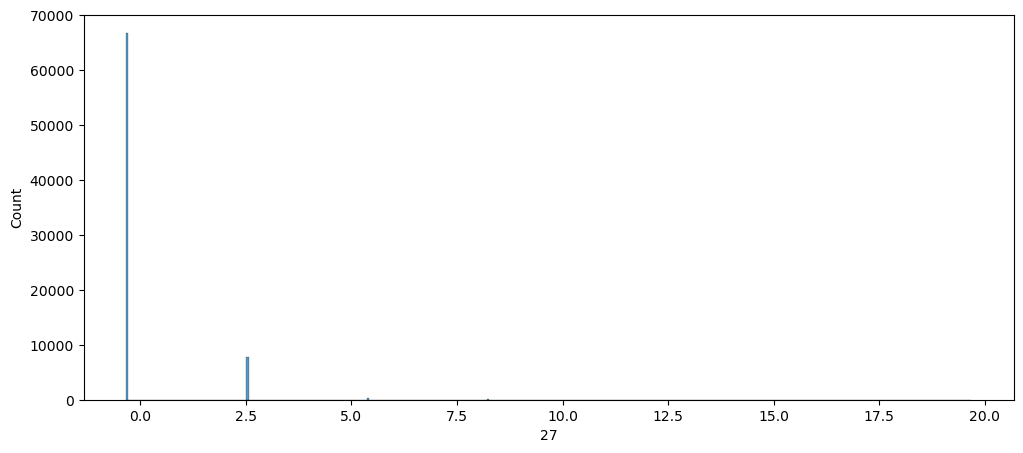

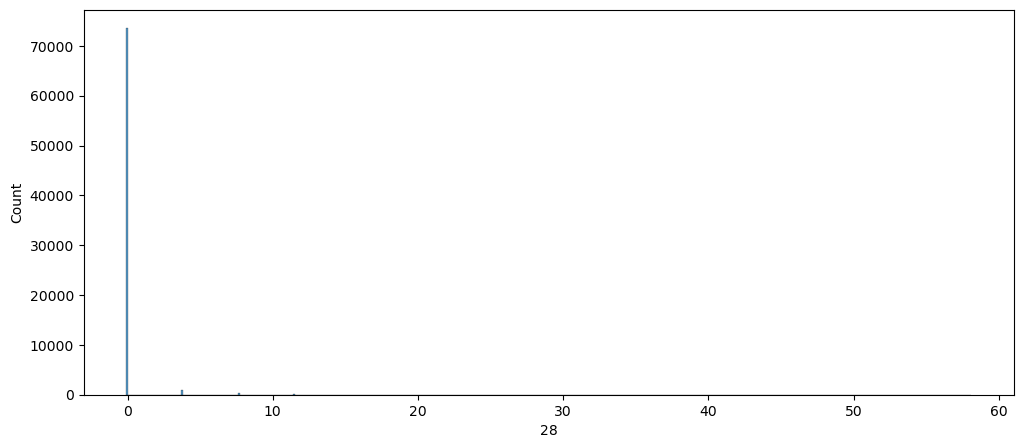

In [91]:
for feature in pd.DataFrame(X_train).columns:
    plt.figure(figsize=(12, 5))
    sns.histplot(data=pd.DataFrame(X_train), x=feature, bins=400)
    plt.xlabel(feature)

# Section 4: Model Building

Everything is now okay we are prepare to test and compare different classification Model.

In [92]:
# Takes in a classifier, trains the classifier, and evaluates the classifier on the dataset
def do_prediction(classifier):
    
    # training the classifier on the dataset
    classifier.fit(X_train, y_train)
    
    #Do prediction and evaluting the prediction
    prediction = classifier.predict(X_test)
    coff_metrix = confusion_matrix(y_test, prediction)
    evaluate_prediction = cross_val(X_train,y_train, classifier)
    
    
    return evaluate_prediction,coff_metrix

def cross_val(X_train, y_train, classifier):
    # Applying k-Fold Cross Validation
    
    accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
    return accuracies.mean()


LogisticRegression Performace on the test_set have an accuracy score of 91.0


Text(0.5, 1.0, 'Logistic Regression Confussion Metrix')

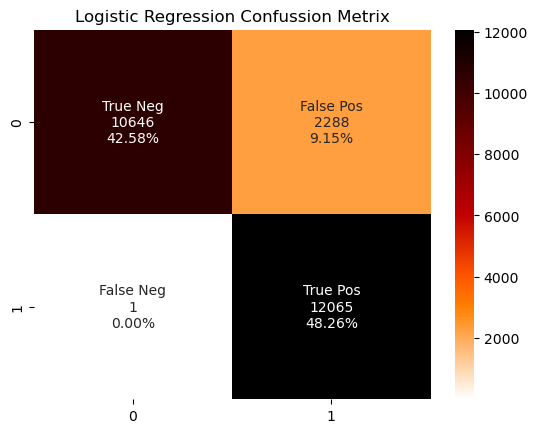

In [93]:
#Training and Making prediction with Logistic Regression classifier
logreg = LogisticRegression(random_state=0)
evaluate_logreg, log_metric = do_prediction(logreg)
print('LogisticRegression Performace on the test_set have an accuracy score of {}'.format((evaluate_logreg *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                log_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     log_metric.flatten()/np.sum(log_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(log_metric, annot=labels, fmt='', cmap='gist_heat_r', ax=ax)
ax.set_title('Logistic Regression Confussion Metrix')

KNeighborsClassifier Performace on the test_set have an accuracy score of 90.0


Text(0.5, 1.0, 'KNeighbors Confussion Metrix')

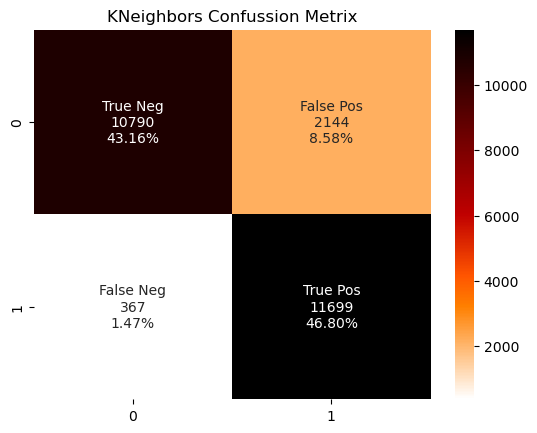

In [94]:
knn= KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')
evaluate_knn, knn_metric = do_prediction(knn)
print('KNeighborsClassifier Performace on the test_set have an accuracy score of {}'.format((evaluate_knn *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                knn_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     knn_metric.flatten()/np.sum(knn_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(knn_metric, annot=labels, fmt='', cmap='gist_heat_r', ax=ax)
ax.set_title('KNeighbors Confussion Metrix')

GaussianNB Performace on the test_set have an accuracy score of 90.0


Text(0.5, 1.0, 'GaussianNB Confussion Metrix')

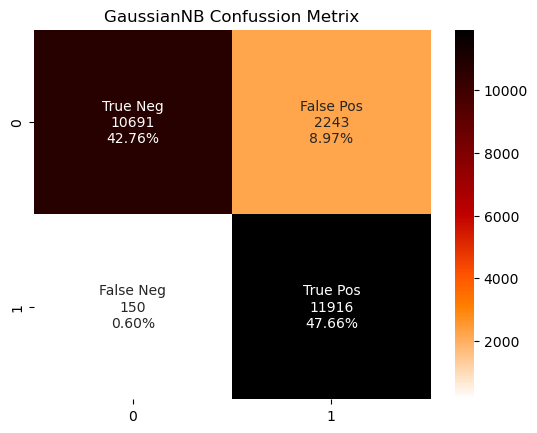

In [95]:
gaussian = GaussianNB()
evaluate_gaussian, gaussian_metric = do_prediction(gaussian)
print('GaussianNB Performace on the test_set have an accuracy score of {}'.format((evaluate_gaussian *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                gaussian_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     gaussian_metric.flatten()/np.sum(gaussian_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(gaussian_metric, annot=labels, fmt='', cmap='gist_heat_r', ax=ax)
ax.set_title('GaussianNB Confussion Metrix')

RandomForest Performace on the test_set have an accuracy score of 93.0


Text(0.5, 1.0, 'RandomForest Confussion Metrix')

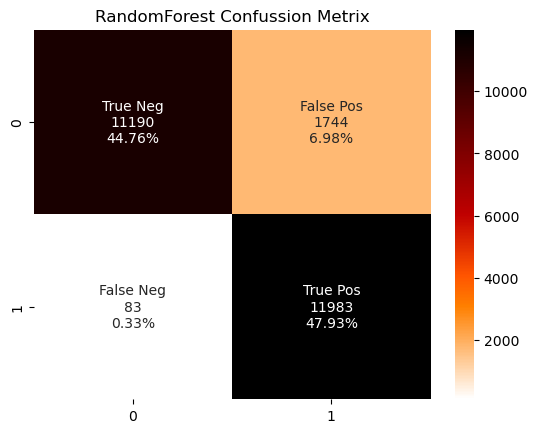

In [96]:
rand = RandomForestClassifier()
evaluate_rand, rand_metric= do_prediction(rand)
print('RandomForest Performace on the test_set have an accuracy score of {}'.format((evaluate_rand *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rand_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rand_metric.flatten()/np.sum(rand_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(rand_metric, annot=labels, fmt='', cmap='gist_heat_r', ax=ax)
ax.set_title('RandomForest Confussion Metrix')

GradientBoosting performace on the test_set have an accuracy score of 91.0


Text(0.5, 1.0, 'GradientBoost Confussion Metrix')

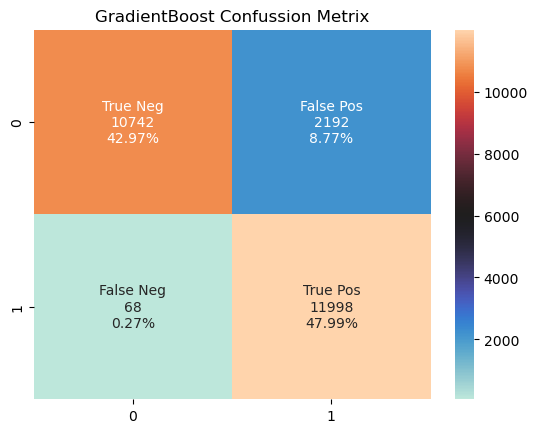

In [97]:
gboost = GradientBoostingClassifier()
evaluate_gboost, gboost_metric = do_prediction(gboost)
print('GradientBoosting performace on the test_set have an accuracy score of {}'.format((evaluate_gboost *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                gboost_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     gboost_metric.flatten()/np.sum(gboost_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(gboost_metric, annot=labels, fmt='', cmap='icefire', ax=ax)
ax.set_title('GradientBoost Confussion Metrix')

DecisiomTree performace on the test_set have an accuracy score of 88.0


Text(0.5, 1.0, 'DecisionTree Confussion Metrix')

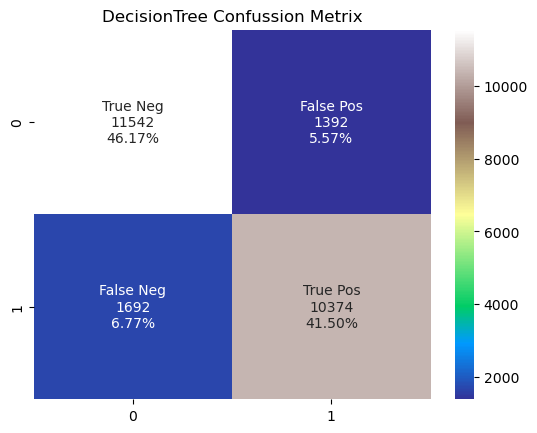

In [98]:
d_tree = DecisionTreeClassifier()
d_tree.maxi_dept=100
evaluate_d_tree, d_tree_metric = do_prediction(d_tree)
print('DecisiomTree performace on the test_set have an accuracy score of {}'.format((evaluate_d_tree *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                d_tree_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     d_tree_metric.flatten()/np.sum(d_tree_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(d_tree_metric, annot=labels, fmt='', cmap='terrain', ax=ax)
ax.set_title('DecisionTree Confussion Metrix')

XBoost Classifier performace on the test_set have an accuracy score of 91.0


Text(0.5, 1.0, 'XBoost Classifier Confussion Metrix')

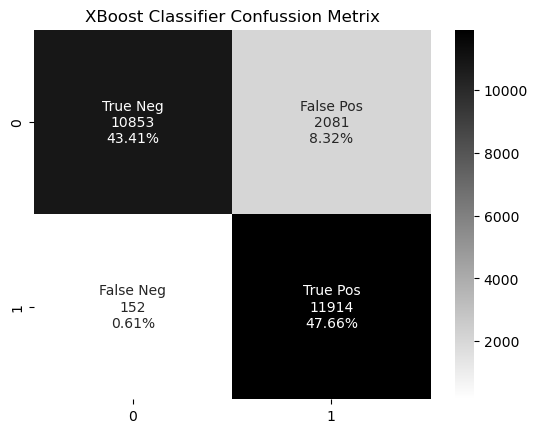

In [99]:
xboost = XGBClassifier()
evaluate_xboost, xboost_metric = do_prediction(xboost)
print('XBoost Classifier performace on the test_set have an accuracy score of {}'.format((evaluate_xboost *100).round()) )
group_names = ["True Neg","False Pos","False Neg",'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xboost_metric.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     xboost_metric.flatten()/np.sum(xboost_metric)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes()
sns.heatmap(xboost_metric, annot=labels, fmt='', cmap='binary', ax=ax)
ax.set_title('XBoost Classifier Confussion Metrix')

Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

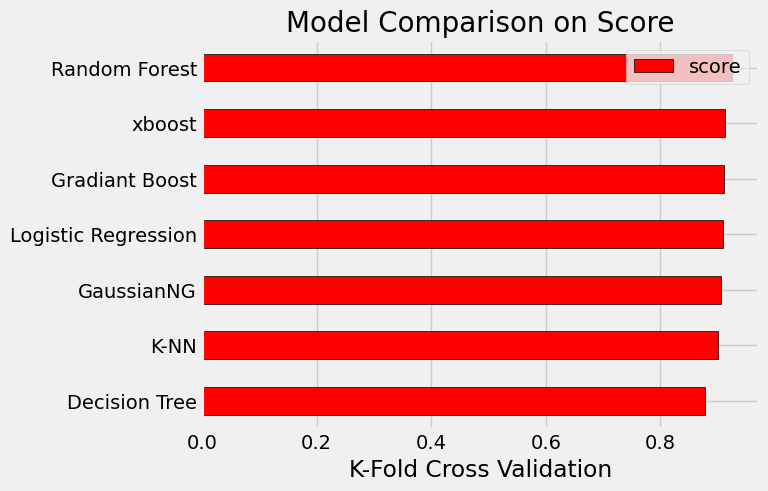

In [100]:
plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
weigh_up = pd.DataFrame({'model': ['Logistic Regression', 'K-NN', 'Decision Tree','Gradiant Boost', 'Random Forest',
                                  'GaussianNG', 'xboost'],
                        'score': [evaluate_logreg, evaluate_knn, evaluate_d_tree
                                  ,evaluate_gboost,evaluate_rand,evaluate_gaussian, evaluate_xboost]})

# Horizontal bar chart of test mae
weigh_up.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);

<span style="color:orange">
 Importing data of Lending club for the years 2012-14
</span>